In [1]:
import contextlib
from itertools import takewhile
from itertools import zip_longest as zipl
from pprint import pprint

import matplotlib as mpl
import matplotlib.colors as mpc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps as mcm
from matplotlib.colors import LinearSegmentedColormap as gradient_cmap
from matplotlib.colors import ListedColormap as categorical_cmap

## Displaying Colormaps

In [2]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list, cmaps:dict=None, return_dict:bool=False, reverse_order:bool=False):
    if cmaps is None: 
        cmaps = {}
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    title=f'{category} colormaps'
    if reverse_order: 
        title += ': reversed'
    axs[0].set_title(title, fontsize=14)

    for ax, name in zip(axs, cmap_list):
        cmap=mcm[name]
        if reverse_order: 
            cmap = cmap.reversed()
            name = cmap.name
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()
        
    plt.show()

    # Save colormap list for later.
    if return_dict: 
        cmaps[category] = cmap_list
        return cmaps

### `matplotlib` built-in colormaps

In [3]:
builtin_cmaps = set(mcm)
print(list(mcm))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

### Sequential

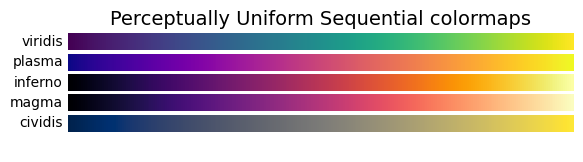

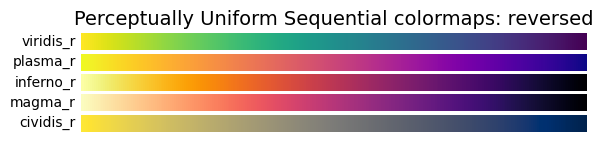

In [4]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'],
                     reverse_order=True)


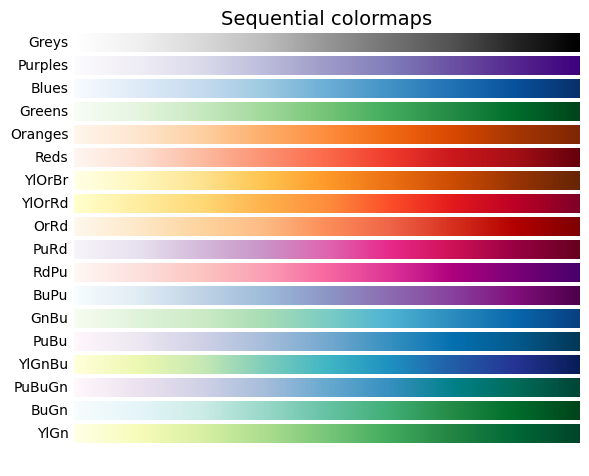

In [5]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

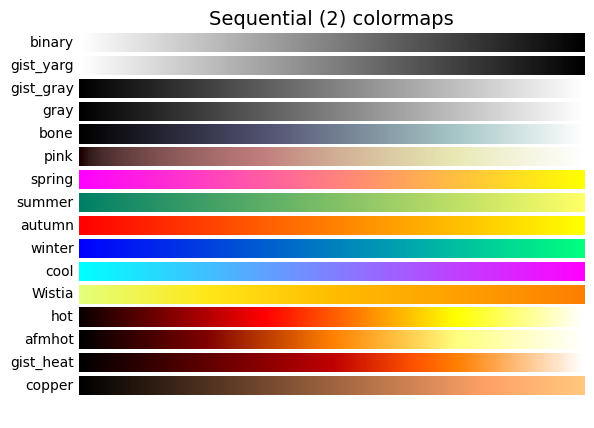

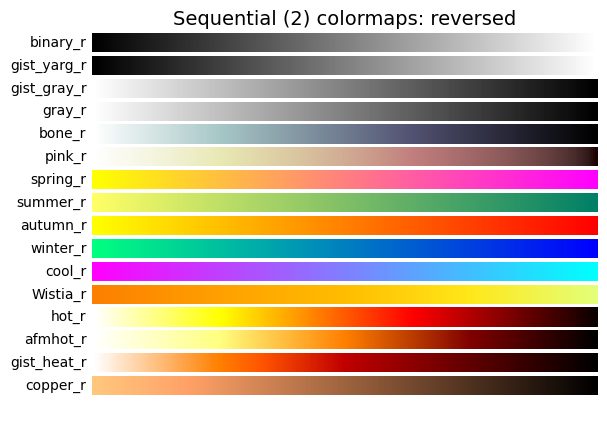

In [6]:
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'], 
                     reverse_order=True)

### Diverging

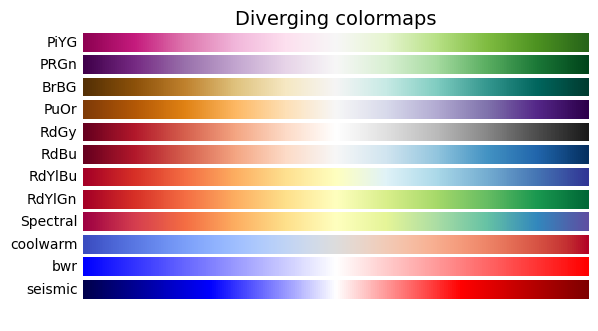

In [7]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

### Cyclic

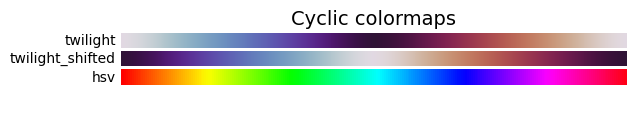

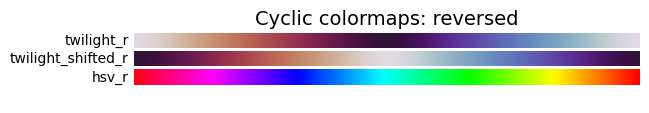

In [8]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'], reverse_order=True)

### Qualitative

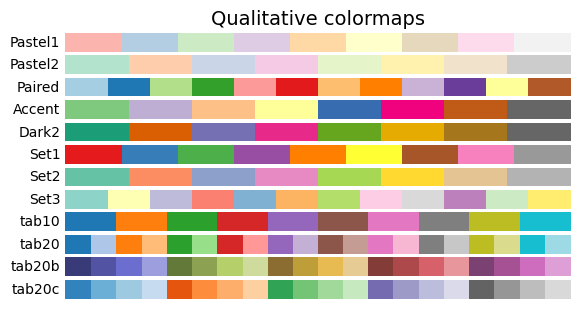

In [9]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

### Miscellaneous

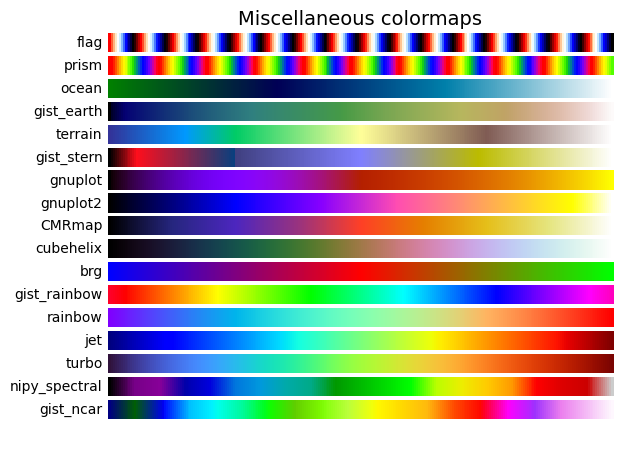

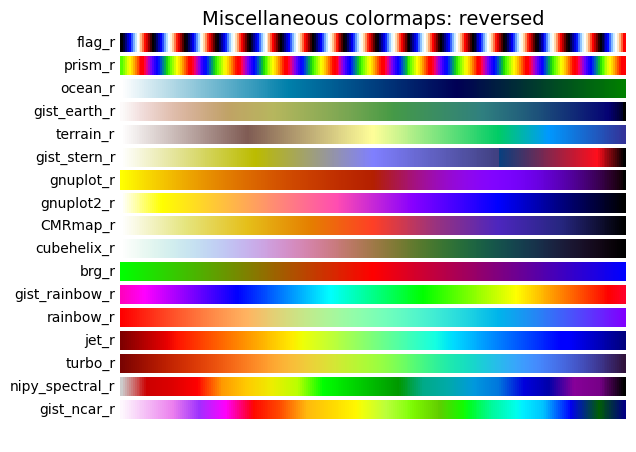

In [10]:
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'], 
                     reverse_order=True)

plt.show()

## Resampled Colormaps

```py
matplotlib.colormaps[COLORMAP_NAME].resampled(N)
mcm[COLORMAP_NAME].resampled(N)
mcm['viridis'].resampled(7)
```

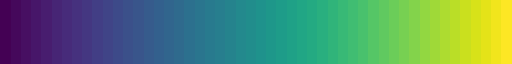

In [11]:
viridis50 = mcm['viridis'].resampled(50)
viridis15 = mcm['viridis'].resampled(15)
viridis50

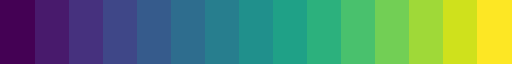

In [12]:
viridis15

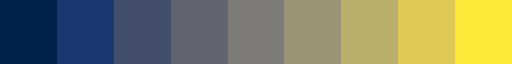

In [13]:
mcm['cividis'].resampled(9)

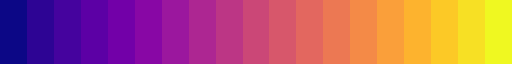

In [14]:
mcm['plasma'].resampled(19)

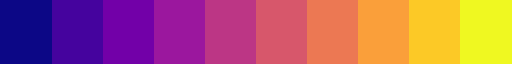

In [15]:
mcm['plasma'].resampled(10)

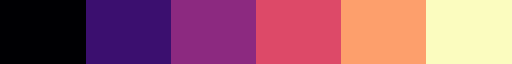

In [16]:
mcm['magma'].resampled(6)


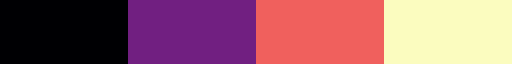

In [17]:
mcm['magma'].resampled(4)

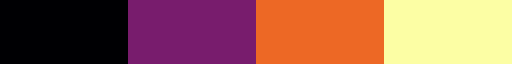

In [18]:
mcm['inferno'].resampled(4)

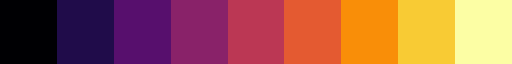

In [19]:
mcm['inferno'].resampled(9)

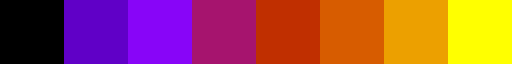

In [20]:
mcm['gnuplot'].resampled(8)

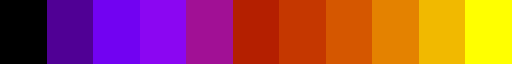

In [21]:
mcm['gnuplot'].resampled(11)

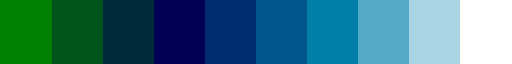

In [22]:
mcm['ocean'].resampled(10)

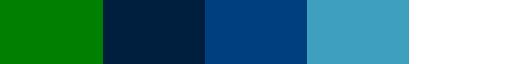

In [23]:
mcm['ocean'].resampled(5)

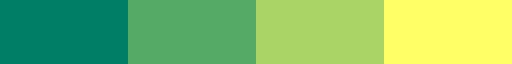

In [24]:
mcm['summer'].resampled(4)

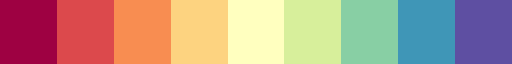

In [25]:
mcm['Spectral'].resampled(9)

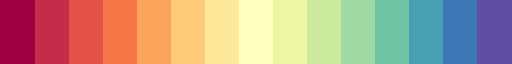

In [26]:
mcm['Spectral'].resampled(15)

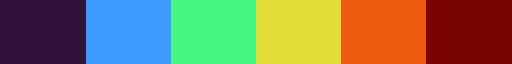

In [27]:
mcm['turbo'].resampled(6)

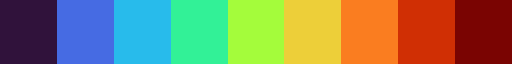

In [28]:
mcm['turbo'].resampled(9)

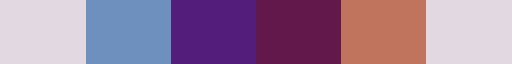

In [29]:
mcm['twilight'].resampled(6)

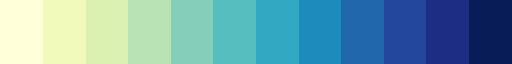

In [30]:
mcm["YlGnBu"].resampled(12)

### Resampling Qualitative Colormaps

i.e. categorical finite list of colors, rather than color gradient

No issues arise if _downsampling_ and the resampled value is less than the original # of colors

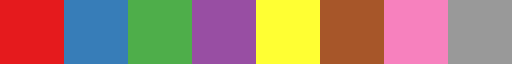

In [31]:
mcm['Set1'].resampled(8)

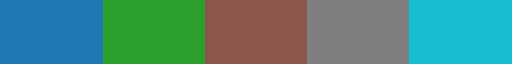

In [32]:
mcm['tab10'].resampled(5)

But if _upsampling_ and the sample is greater the # of original colors, there will be duplicates.

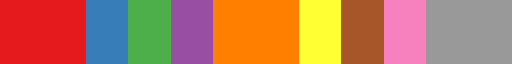

In [33]:
mcm['Set1'].resampled(12)

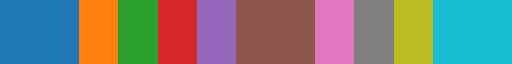

In [34]:
mcm['tab10'].resampled(13)

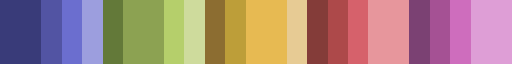

In [35]:
mcm['tab20b'].resampled(25)

To get around this if need be^
the color list can be used to create a new gradient, 
which can then be sampled (theoretically) without hue duplication

^honestly not sure there would ever be a _need_ to do this

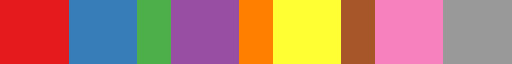

In [36]:
mcm['Set1'].resampled(15)

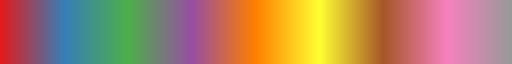

In [37]:
gradient_cmap.from_list('Set1_g',list(mcm['Set1'].colors))

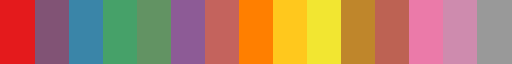

In [38]:
gradient_cmap.from_list('Set1_15',list(mcm['Set1'].colors)).resampled(15)

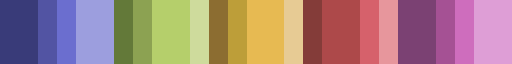

In [39]:
mcm['tab20b'].resampled(27)

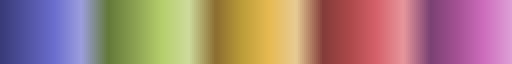

In [40]:
gradient_cmap.from_list('tab20b_g',list(mcm['tab20b'].colors))

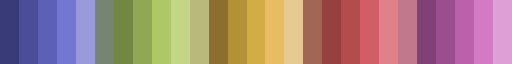

In [41]:
gradient_cmap.from_list('tab20b_g',list(mcm['tab20b'].colors)).resampled(27)

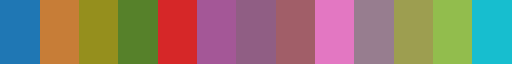

In [42]:
gradient_cmap.from_list('tab13',list(mcm['tab10'].colors)).resampled(13)

## Creating colormaps from color lists


In [43]:
def safe_register(cmap:(mpc.ListedColormap 
                        or mpc.LinearSegmentedColormap)) -> None:
    with contextlib.suppress(ValueError):
        mcm.register(cmap=cmap)
        
def reverse_and_register(cm_list) -> list:
    reversed_cm = [cm.reversed() for cm in cm_list]

    for cm in cm_list + reversed_cm:
        safe_regiser(cm)
    return reversed_cm


### Categorical Colormaps

```py
matplotlib.colors.ListedColormap(COLOR_LIST)
categorical_cmap(COLOR_LIST, [name=NAME])
categorical_cmap(["purple", "gold", "teal"], name='mardi_gras')
```

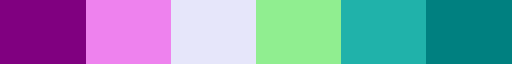

In [44]:
 categorical_cmap(["purple", "violet", "lavender", "lightgreen", "lightseagreen", "teal"])

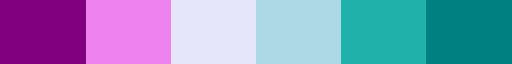

In [45]:
 categorical_cmap(["purple", "violet", "lavender", "lightblue", "lightseagreen", "teal"])

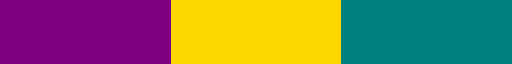

In [46]:
new_cmaps = (
    categorical_cmap(["purple", "gold", "teal"], name='mardi_gras'),
    categorical_cmap(
        ['xkcd:easter purple', 'purple', 'xkcd:purpley pink',
         'xkcd:bubblegum pink', 'xkcd:light pink', 'xkcd:light salmon',
         '#ffcc6e', "xkcd:lemon", 'lightgreen',
         'xkcd:light sky blue', "xkcd:robin's egg",
         'xkcd:cerulean blue', 'xkcd:royal'],
        name='easter'),
    categorical_cmap(
        ["xkcd:royal purple", "xkcd:barney purple", "xkcd:pale purple",
         "xkcd:pale lilac", "xkcd:heather", "xkcd:silver", "xkcd:steel",
         "xkcd:light grey blue", "xkcd:cornflower blue", "xkcd:marine",
         "xkcd:aquamarine", "xkcd:light blue green",  "xkcd:green", "g",
         "xkcd:lemon", "xkcd:pale gold",  "xkcd:sunflower", "xkcd:ecru"],
        name='catmap'),
    categorical_cmap(
        ['xkcd:pale green', 'lawngreen', 'xkcd:green',
         'g', 'xkcd:deep green', 'xkcd:dark green',
         'k', 'xkcd:charcoal', 'xkcd:silver', 'w'],
        name='gkw'
    ),
    categorical_cmap(
        ["purple", "violet", "lightgreen", "lightseagreen", "teal"],
        name='little_mermaid'),
)
new_cmaps[0]

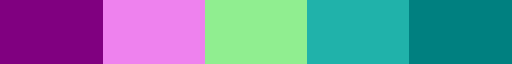

In [47]:
new_cmaps[-1]

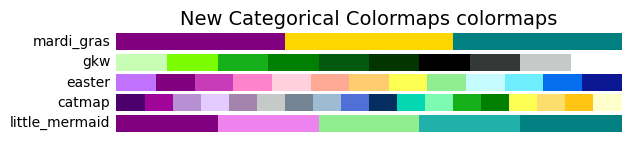

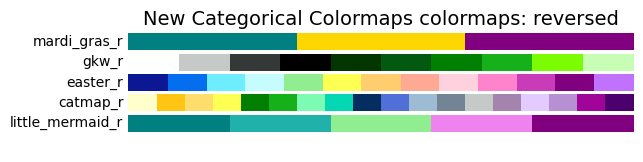

In [48]:
for cm in new_cmaps:
    safe_register(cm)

plot_color_gradients('New Categorical Colormaps', list(set(mcm)- builtin_cmaps))
plot_color_gradients('New Categorical Colormaps', list(set(mcm)- builtin_cmaps), reverse_order=True)

### Gradient Colormaps

```py
matplotlib.colors.LinearSegmentedColormap.from_list()
gradient_cmap.from_list(NAME, COLOR_LIST)
gradient_cmap.from_list(
    "purple_teal",
    ["purple", "teal"])
```

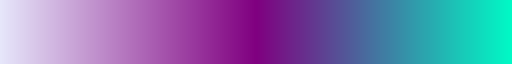

In [49]:
new_gradient_ex = gradient_cmap.from_list(
    "lavender_teal",
    ["lavender","purple", "xkcd:bright teal"])
new_gradient_ex

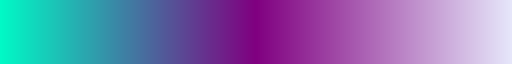

In [50]:
new_gradient_ex.reversed()

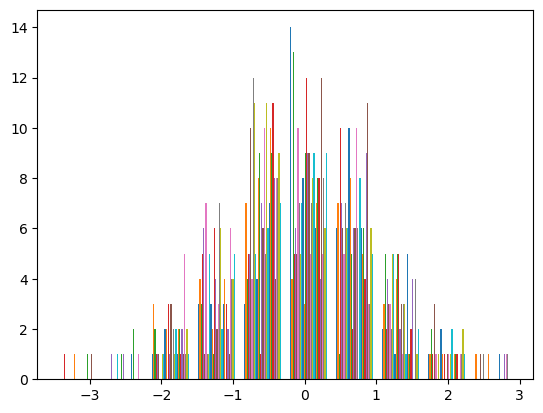

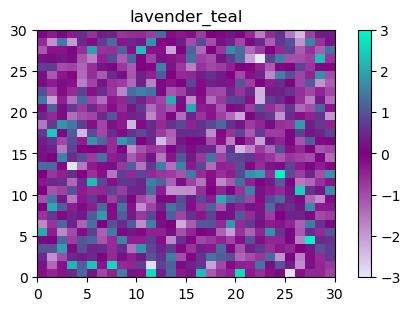

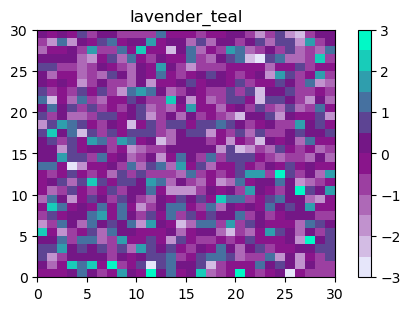

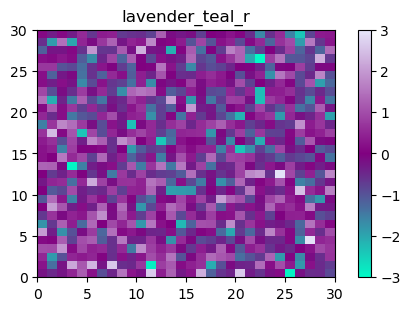

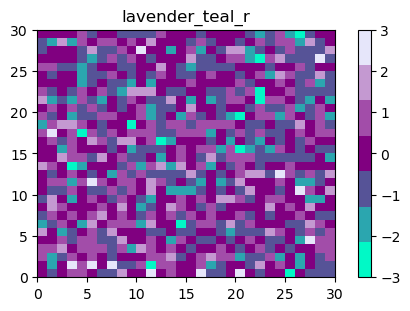

In [51]:
# int(f"{np.datetime64('now', 'h')}".replace('-','').replace('T', ''))

def plot_examples(colormaps:list or tuple, 
                  resample_n:int=None,
                  reverse_order:bool=False,
                  row_len:int=4,
                  data_hist:bool=False) -> dict or None:
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(int(f"{np.datetime64('now', 'h')}".replace('-','').replace('T', '')))
    data = np.random.randn(30, 30)
    colormaps = list(colormaps)
    
    if resample_n: 
        colormaps = (c.resampled(resample_n) for c in colormaps)
    if data_hist:
        plt.hist(data)
    for cm_grp in zipl(*[iter(colormaps)]*row_len):
        n = len(list(takewhile(lambda cm: cm is not None, cm_grp)))
        fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                                layout='constrained', squeeze=False)
        for [ax, cmap] in zip(axs.flat, cm_grp):
            if cmap is None: 
                break
            if reverse_order: 
                cmap = cmap.reversed()
            psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-3, vmax=3)
            ax.set(title = str(cmap.name))
            fig.colorbar(psm, ax=ax)
        plt.show()

plot_examples([new_gradient_ex], data_hist=True)
plot_examples([new_gradient_ex], 12)
plot_examples([new_gradient_ex], reverse_order=True)
plot_examples([new_gradient_ex], 7, True)

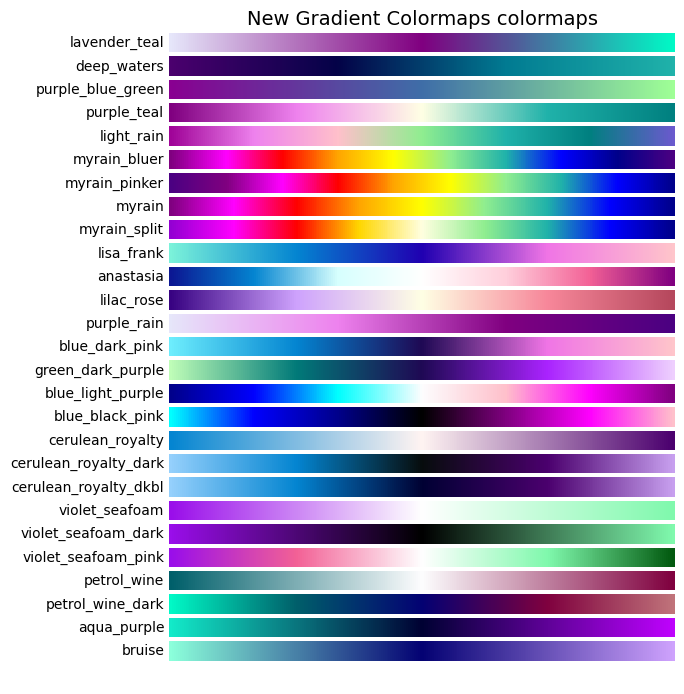

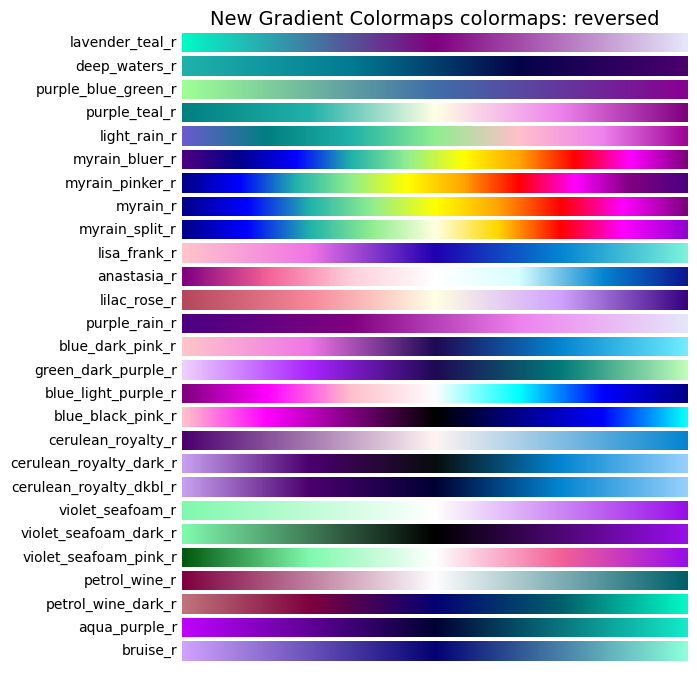

In [52]:
new_gradients = (
    new_gradient_ex,
    # gradient_cmap.from_list("purple_teal", ["purple", "teal"]),
    # gradient_cmap.from_list('deep_waters', ['#512371', "xkcd:night blue","xkcd:ocean","lightseagreen"]),
    gradient_cmap.from_list('deep_waters',
                            ['xkcd:royal purple', "xkcd:night blue", "xkcd:ocean", "lightseagreen"]),
    # gradient_cmap.from_list('under_the_sea',
    #                         ["purple", 'slateblue', "teal", "lightseagreen", "lightgreen"]),
    gradient_cmap.from_list('purple_blue_green',
                            ["#890091", "#3f6ea8", "#9fff96"]),
    gradient_cmap.from_list("purple_teal",
                            ["purple", "violet", "xkcd:off white", "lightseagreen", "teal"]),
    gradient_cmap.from_list("light_rain",
                            ["xkcd:barney purple", "violet", "pink", "lightgreen",
                             "lightseagreen", "teal", "slateblue"]),
    gradient_cmap.from_list("myrain_bluer",
                            ["purple", "magenta", "red", "orange", "yellow",
                             "lightgreen", 'lightseagreen', "blue", "darkblue", "indigo"]),
    gradient_cmap.from_list("myrain_pinker",
                            ["indigo", "purple", "magenta", "red", "orange",
                             "yellow", "lightgreen", 'lightseagreen', "blue", "darkblue"]),
    gradient_cmap.from_list("myrain",
                            ["purple", "magenta", "red", "orange", "yellow",
                             "lightgreen", 'lightseagreen', "blue", "darkblue"]),
    gradient_cmap.from_list("myrain_split",
                            ["darkviolet", "magenta", "red", "gold",
                             "lightyellow", "lightgreen", 'lightseagreen', "blue", "darkblue"]),
    # gradient_cmap.from_list("purple_rain_rose",
    #                         ["#e15c6e", "#ec7373", "#faa6a6", "#ffcccd",
    #                          "#f2c7d8", "violet",  "#c90cd3", "indigo"]),
    # gradient_cmap.from_list("bluepurplerain", [
    #                         "slateblue", "xkcd:pale lavender", "violet", "magenta", "purple", "indigo"]),
    # gradient_cmap.from_list("blackpurplerain", ["k", "xkcd:pale lavender",
    #                                             "violet", "magenta", "purple", "indigo"]),
    gradient_cmap.from_list("lisa_frank",
                            ['xkcd:tiffany blue', 'xkcd:cerulean', 'xkcd:ultramarine', 'xkcd:purply pink', "xkcd:light rose"]),
    gradient_cmap.from_list("anastasia",
                            ["xkcd:royal", 'xkcd:cerulean', 'xkcd:ice blue', 'w', 'xkcd:pale pink', "xkcd:medium pink", "purple"]),
    gradient_cmap.from_list("lilac_rose",
                            ["xkcd:indigo", "xkcd:lilac", 'xkcd:off white', "xkcd:rose pink", "xkcd:dark rose"]),
    gradient_cmap.from_list("purple_rain",
                            ["lavender", "violet", "purple", "indigo"]),
    gradient_cmap.from_list("blue_dark_pink",
                            ["xkcd:robin's egg", 'xkcd:cerulean', 'xkcd:dark indigo', 'xkcd:purply pink', "xkcd:light rose"]),
    gradient_cmap.from_list("green_dark_purple",
                            ['xkcd:celadon', 'xkcd:bluegreen', 'xkcd:dark indigo', 'xkcd:electric purple', 'xkcd:pale lavender']),
    gradient_cmap.from_list("blue_light_purple",
                            ["darkblue", "blue", "cyan", "xkcd:pale grey", "pink", "magenta", "purple"]),
    gradient_cmap.from_list("blue_black_pink",
                            ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"]),
    gradient_cmap.from_list("cerulean_royalty",
                            ['xkcd:cerulean', 'xkcd:very light pink', 'xkcd:royal purple']),
    gradient_cmap.from_list("cerulean_royalty_dark",
                            ['xkcd:light blue', 'xkcd:cerulean', 'xkcd:almost black', 'xkcd:royal purple', 'xkcd:lavender']),
    gradient_cmap.from_list("cerulean_royalty_dkbl",
                            ['xkcd:light blue', 'xkcd:cerulean', 'xkcd:very dark blue', 'xkcd:royal purple', 'xkcd:lavender']),
    gradient_cmap.from_list("violet_seafoam",
                            ['xkcd:violet', 'w', 'xkcd:seafoam']),
    gradient_cmap.from_list("violet_seafoam_dark", [
                            'xkcd:violet', 'black', 'xkcd:seafoam']),
    gradient_cmap.from_list("violet_seafoam_pink",
                            ['xkcd:violet', 'xkcd:medium pink', 'w', 'xkcd:seafoam', 'xkcd:deep green']),
    gradient_cmap.from_list("petrol_wine",
                            ['xkcd:petrol', 'xkcd:pale grey', 'xkcd:wine']),
    gradient_cmap.from_list("petrol_wine_dark",
                            ['xkcd:bright teal', 'xkcd:petrol', 'xkcd:deep blue', 'xkcd:wine', 'xkcd:dusty rose']),
    gradient_cmap.from_list("aqua_purple",
                            ['xkcd:aqua', 'xkcd:very dark blue', 'xkcd:bright purple']),
    gradient_cmap.from_list("bruise",
                            ['xkcd:light aqua', 'xkcd:deep blue', 'xkcd:lilac'])
)

for cm in new_gradients:
    safe_register(cm)

new_gradient_names = [c.name for c in new_gradients]
plot_color_gradients('New Gradient Colormaps', new_gradient_names)
plot_color_gradients('New Gradient Colormaps',
                     new_gradient_names, reverse_order=True)

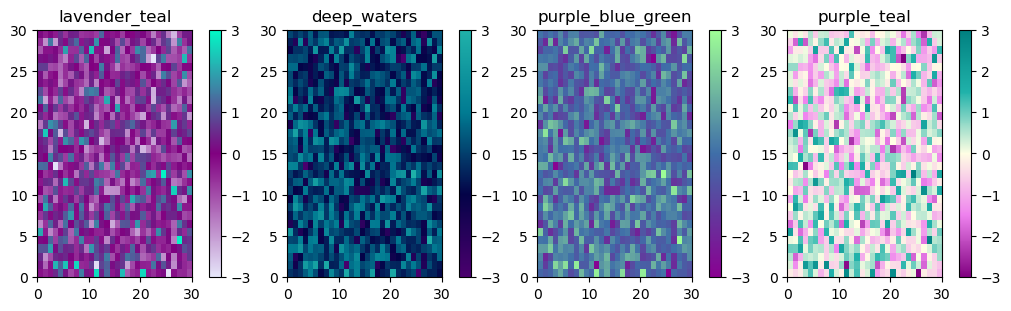

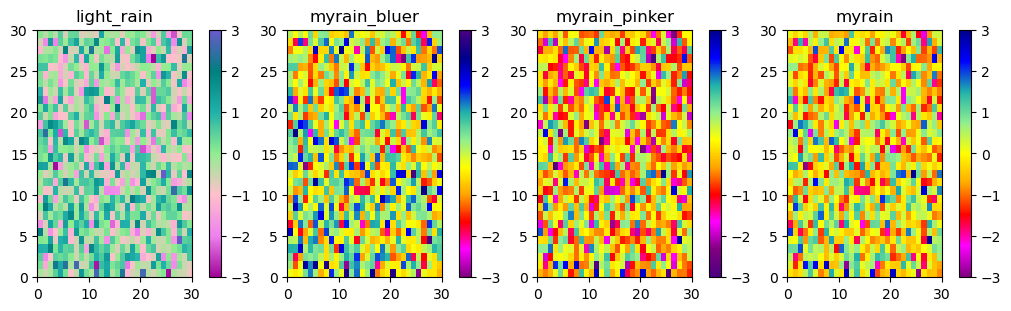

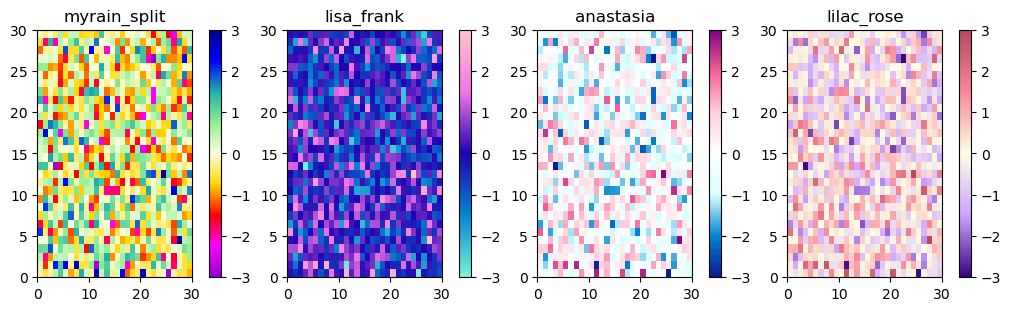

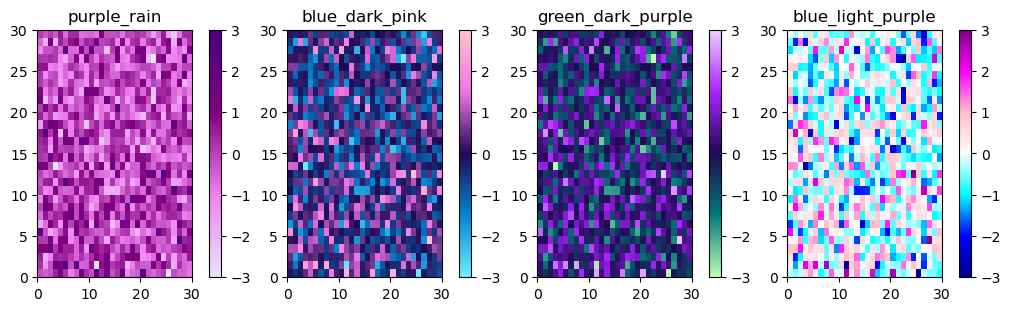

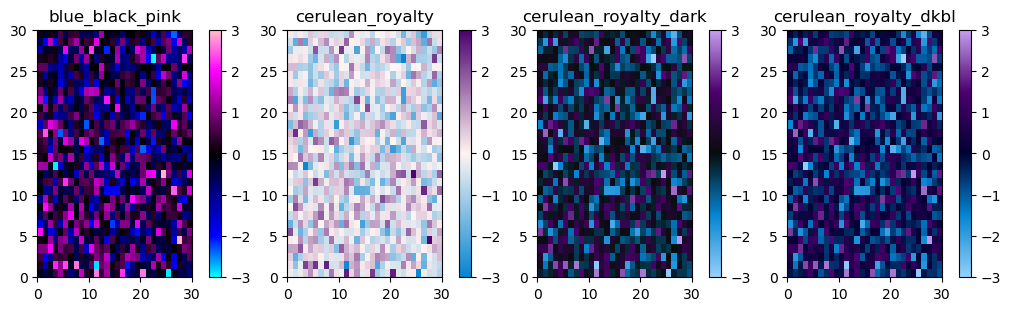

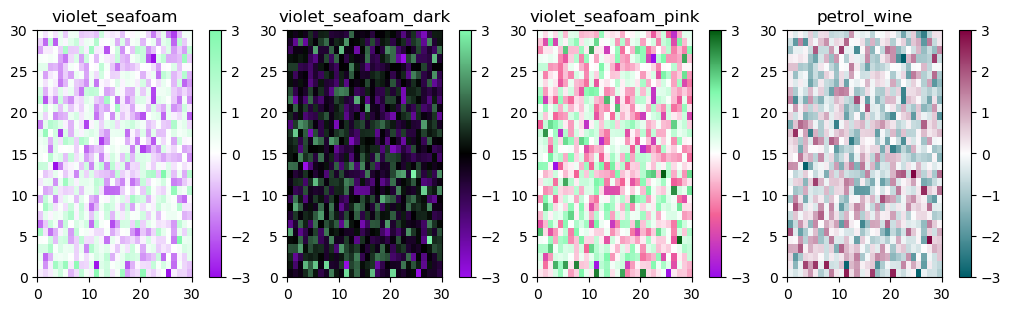

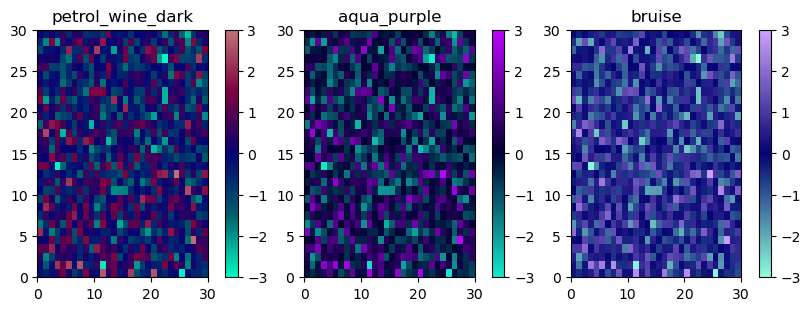

In [53]:
plot_examples(new_gradients)

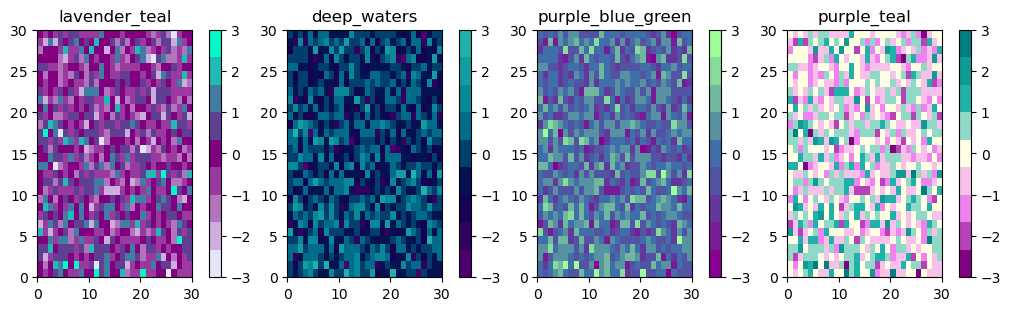

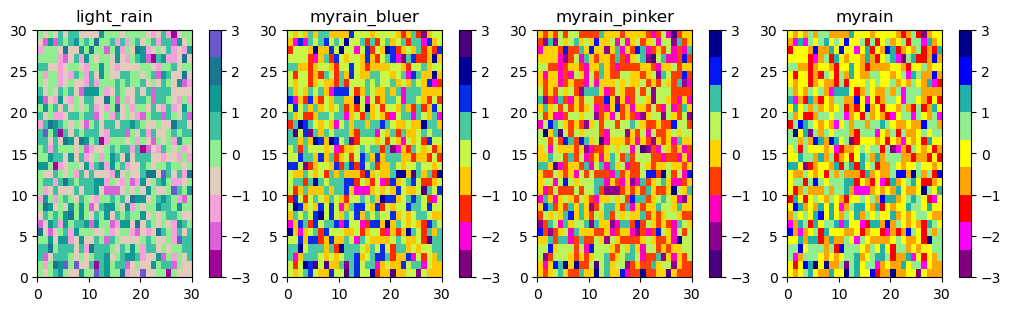

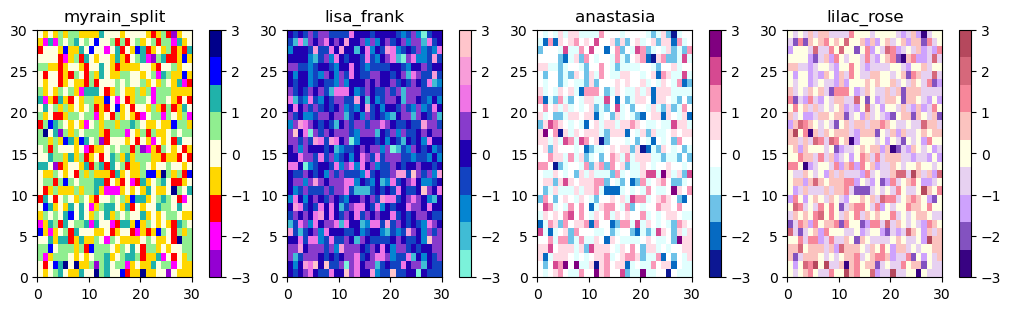

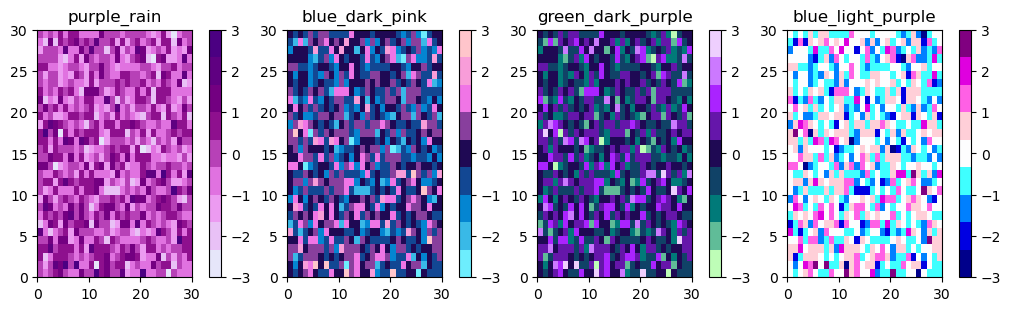

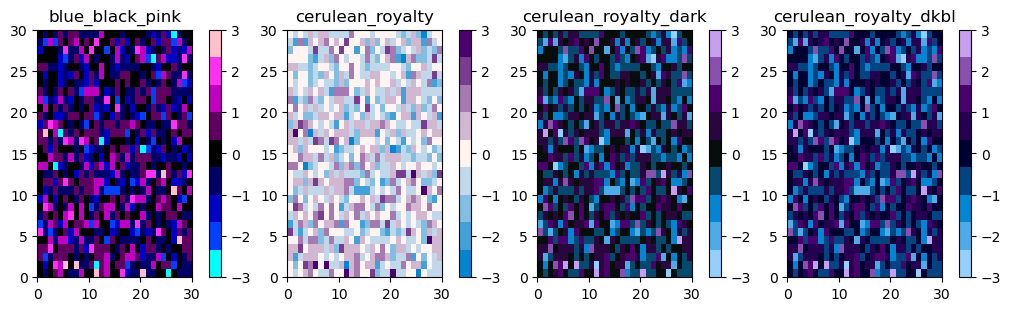

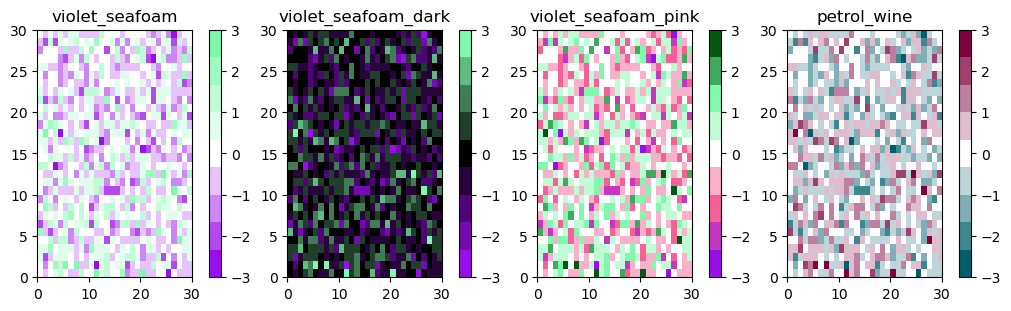

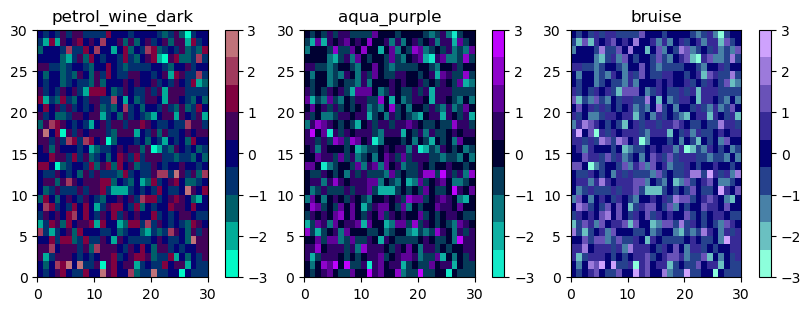

In [54]:
plot_examples(new_gradients, resample_n=9)

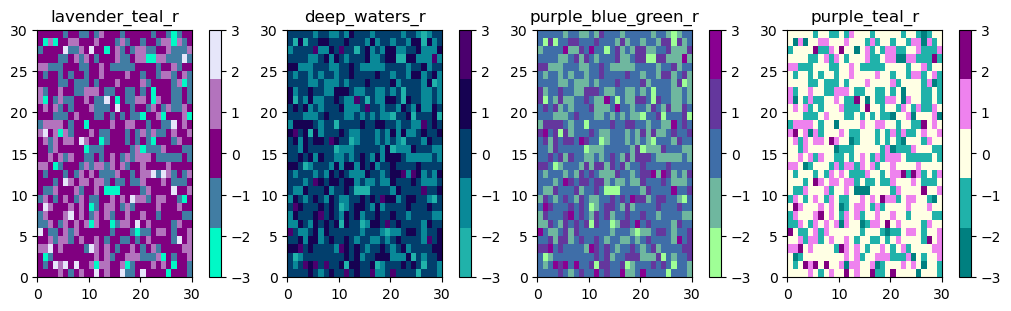

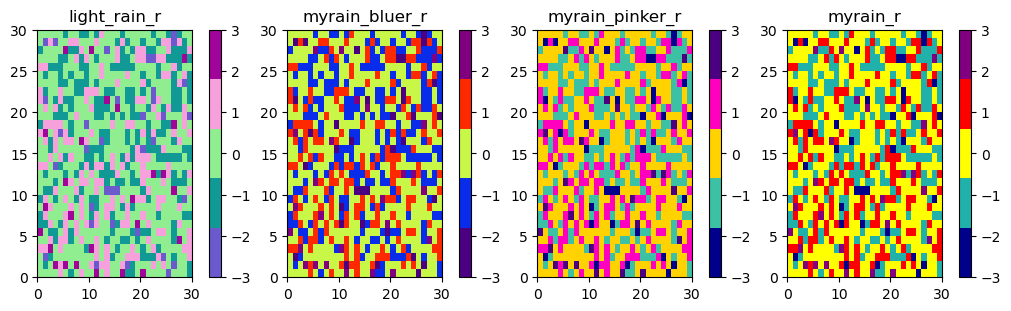

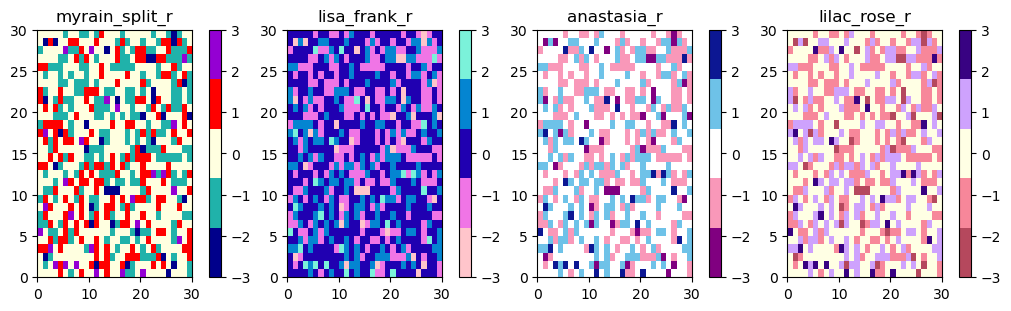

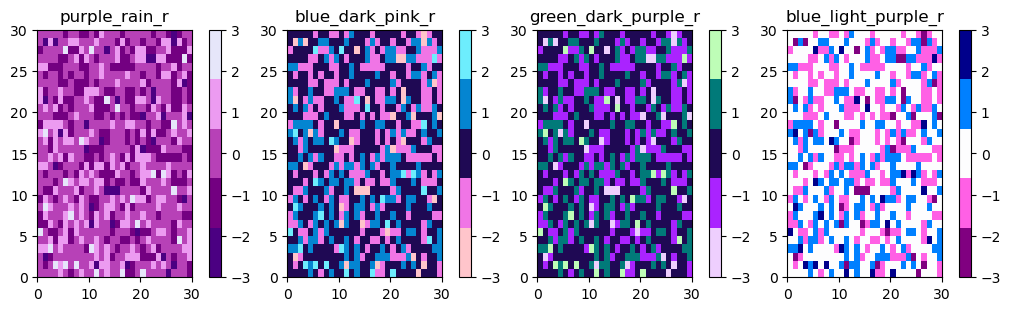

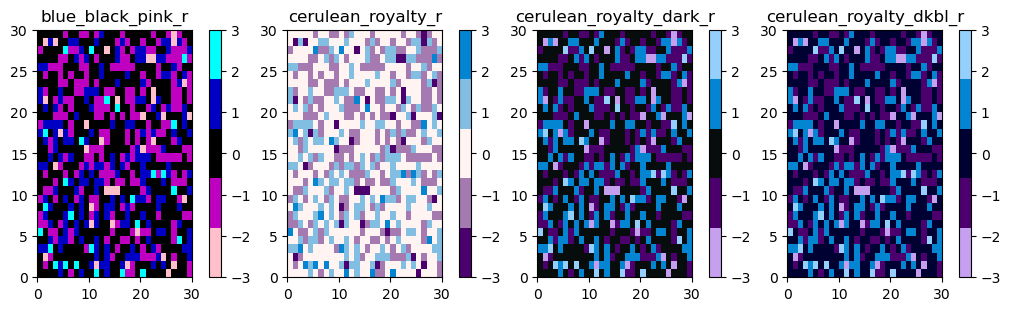

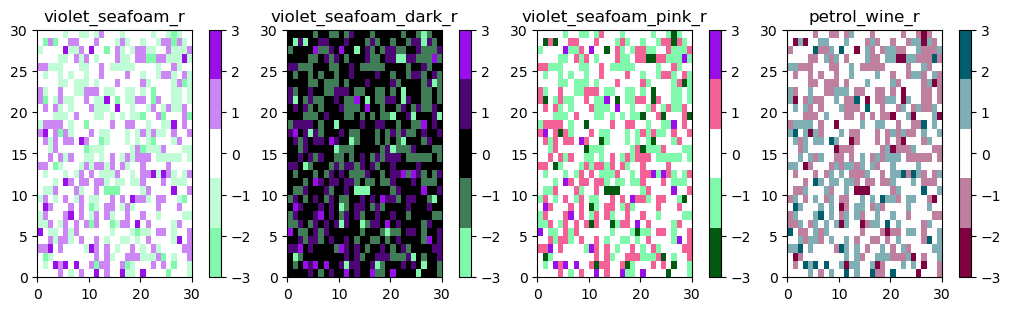

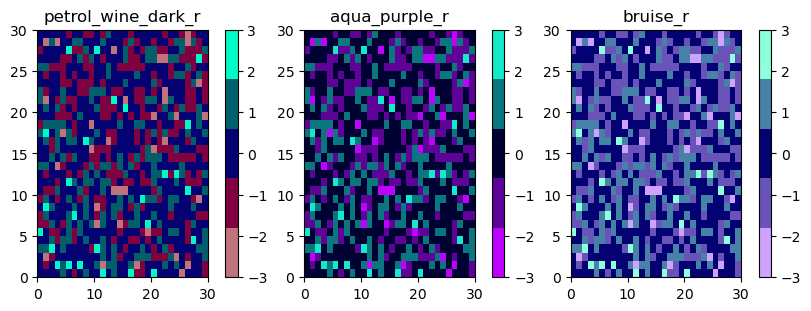

In [55]:
plot_examples(new_gradients, resample_n=5, reverse_order=True)

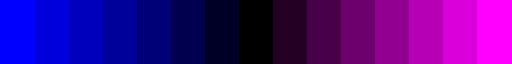

In [56]:
N=15
gradient_cmap.from_list("bk_magenta1", ["blue", "darkblue", "black", "purple", "magenta"]).resampled(N)

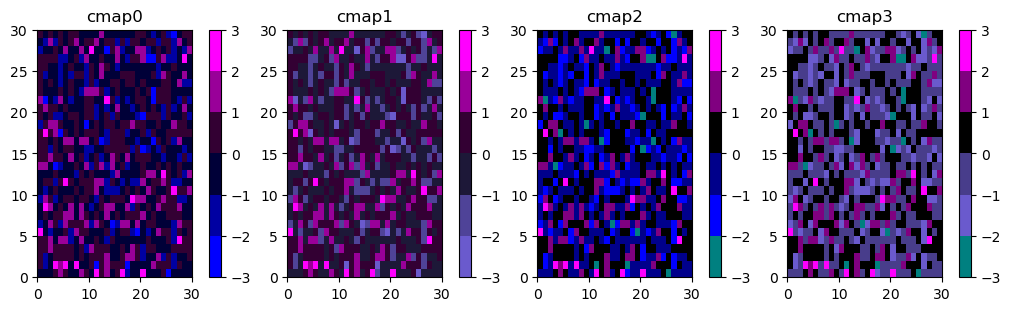

In [57]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["blue", "darkblue", "black", "purple",  "magenta"],
         ["slateblue", "darkslateblue", "black", "purple",  "magenta"],
         ["teal", "blue", "darkblue", "black", "purple",  "magenta"],
         ["teal", "slateblue", "darkslateblue", "black", "purple",  "magenta"],
     ])], resample_n=6)

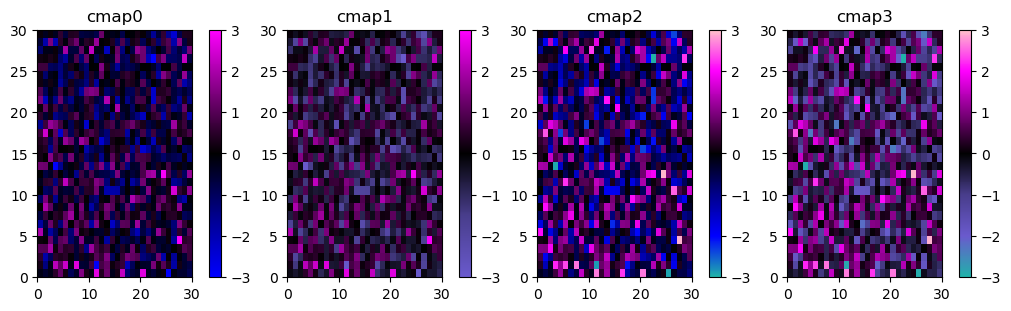

In [58]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["blue", "darkblue", "black", "purple",  "magenta"],
         ["slateblue", "darkslateblue", "black", "purple",  "magenta"],
         ["lightseagreen", "blue", "darkblue",
             "black", "purple",  "magenta", "pink"],
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "magenta", "pink"],
     ])])

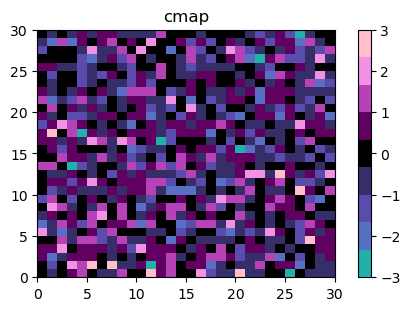

In [59]:
plot_examples(
    [gradient_cmap.from_list("cmap", 
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"]),
     ], resample_n=9)

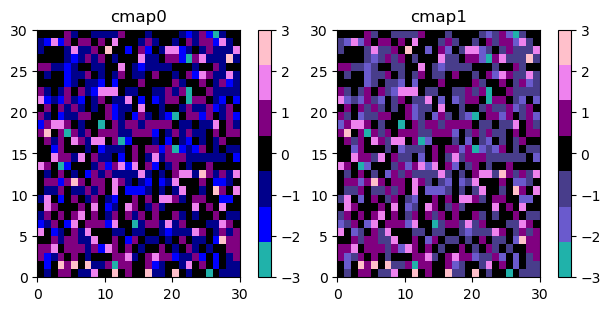

In [60]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "blue", "darkblue",
             "black", "purple",  "violet", "pink"],
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
     ])], resample_n=7)


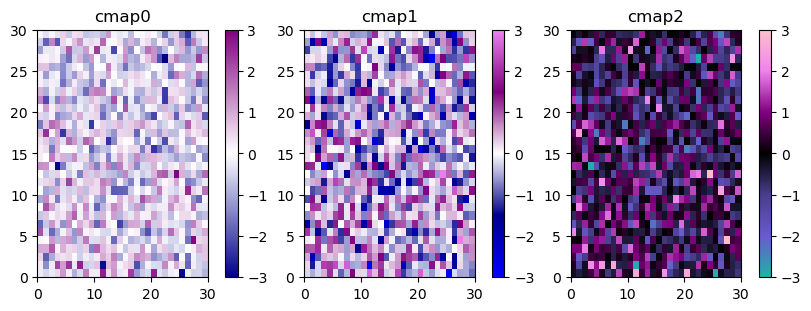

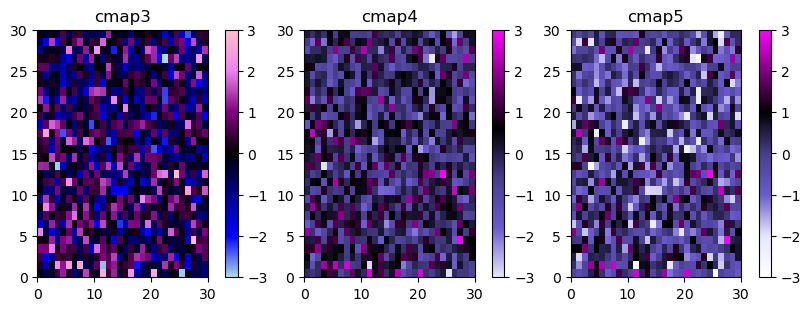

In [65]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         [ "darkblue", "white", "purple" ],
         ["blue", "darkblue", "white", "purple",  "violet", ],
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["lavender", "slateblue", "darkslateblue", "black", "purple",  "magenta"],
         ["white", "lavender", "slateblue",
             "darkslateblue", "black", "purple",  "magenta"]
     ])], 
    row_len=3)

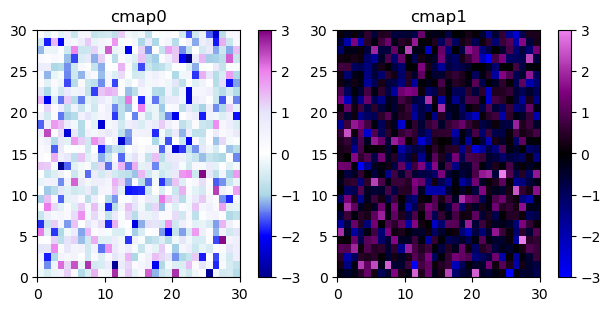

In [66]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "lavender", "violet", "purple"],
         ["blue", "darkblue", "black", "purple",  "violet"],
     ])])


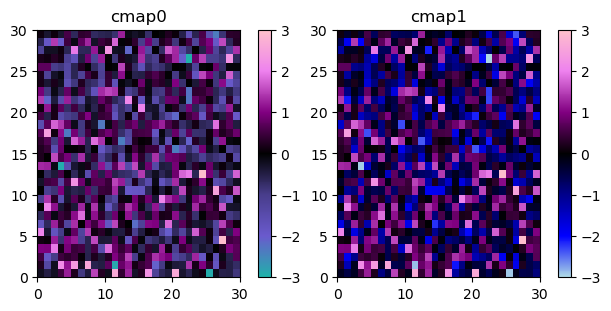

In [67]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         
     ])])

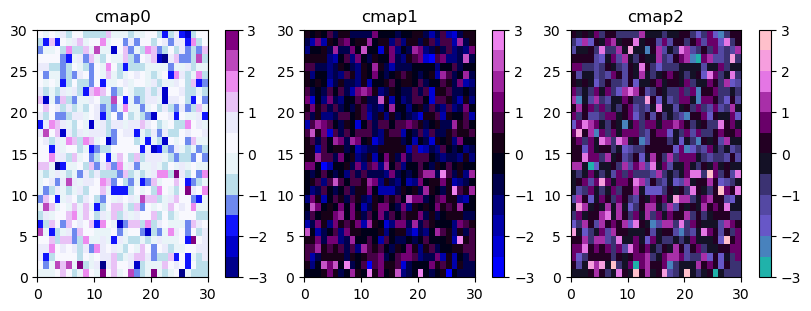

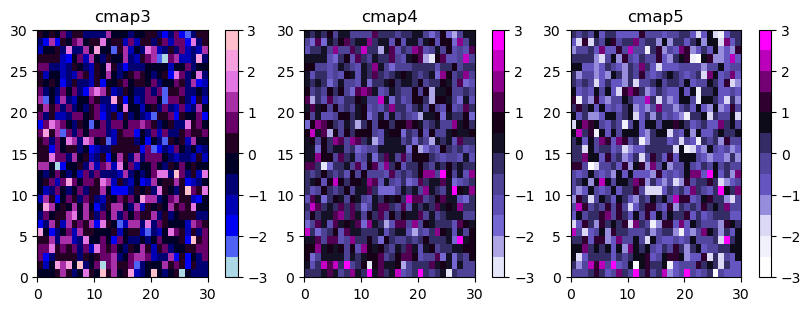

In [68]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "lavender", "violet", "purple"],
         ["blue", "darkblue", "black", "purple",  "violet"],
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["lavender", "slateblue", "darkslateblue", "black", "purple",  "magenta"],
         ["white", "lavender", "slateblue",
             "darkslateblue", "black", "purple",  "magenta"]
     ])], 
    row_len=3,
    resample_n=12)

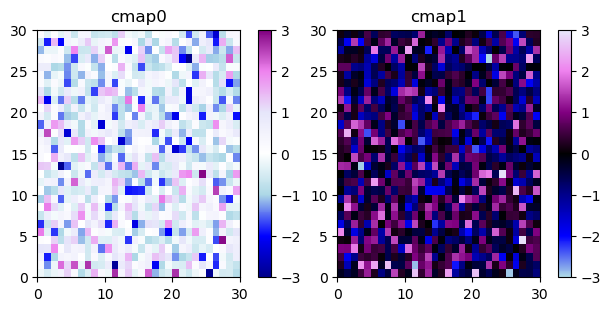

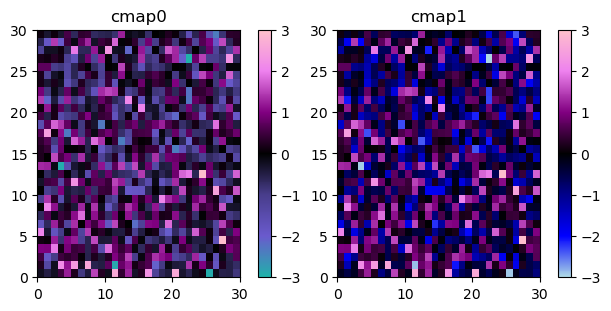

In [69]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "lavender", "violet", "purple"],
         ["lightblue", "blue", "darkblue", "black",
             "purple",  "violet", "lavender"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

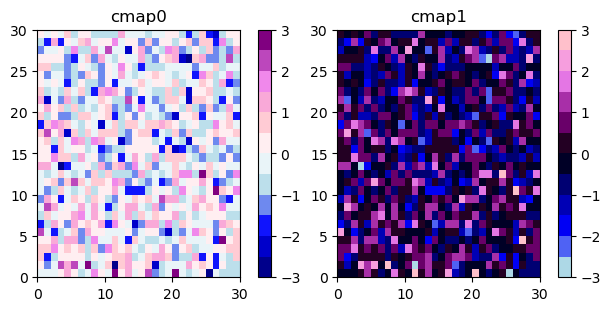

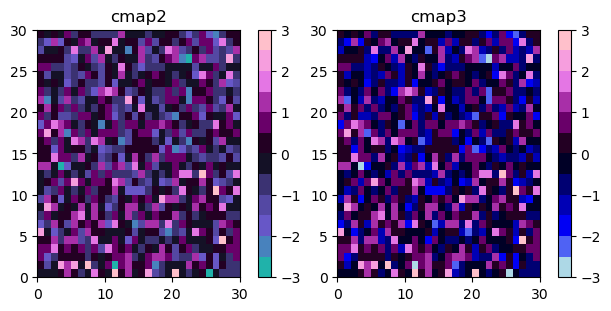

In [56]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])], row_len=2, resample_n=12)

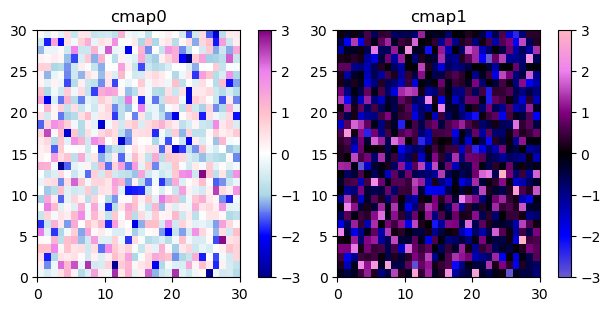

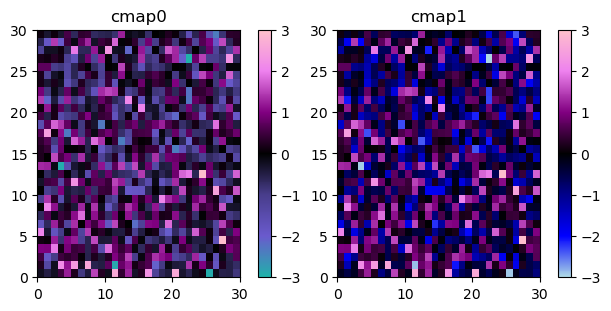

In [71]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["slateblue", "blue", "darkblue", "black",
             "purple",  "violet", "lightpink"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

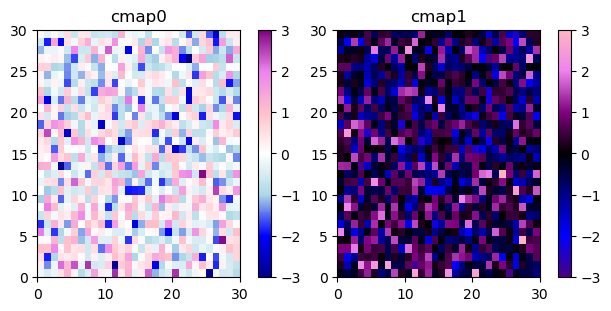

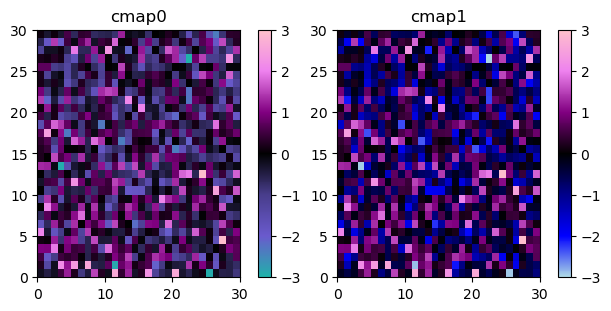

In [72]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["indigo", "blue", "darkblue", "black", "purple",  "violet", "lightpink"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

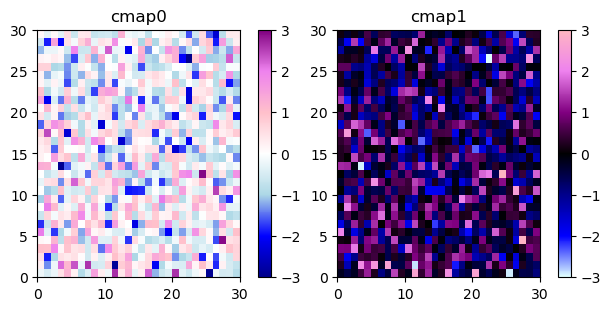

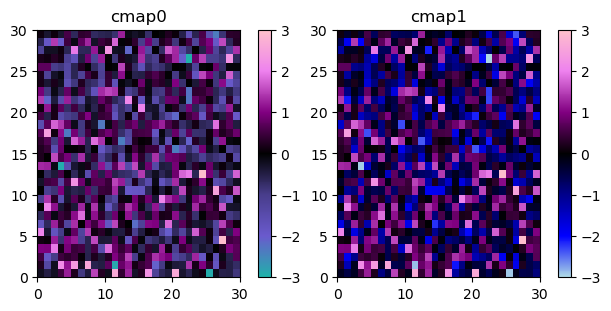

In [73]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["lightcyan", "blue", "darkblue", "black",
             "purple",  "violet", "lightpink"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

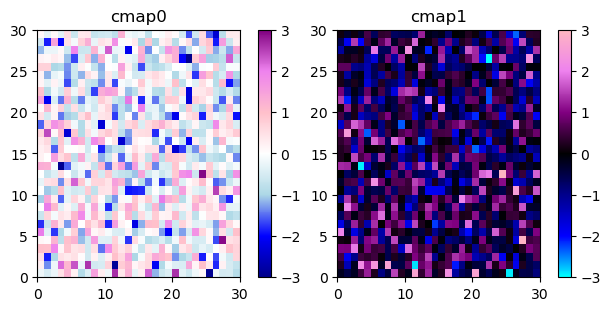

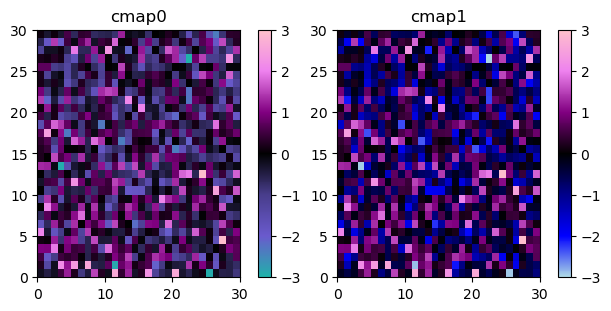

In [74]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "lightpink"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

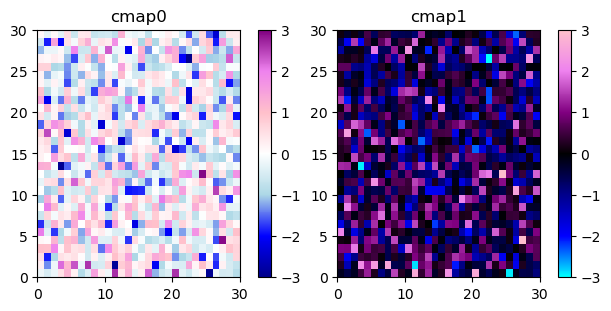

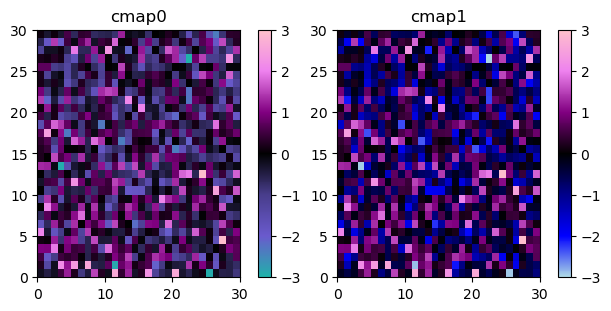

In [75]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

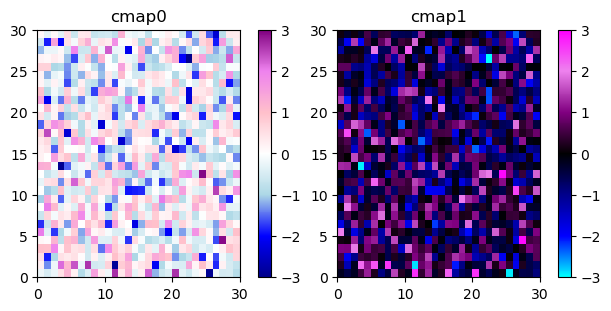

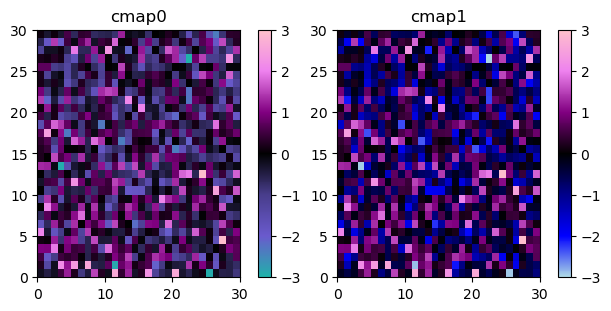

In [76]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "magenta"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["lightseagreen", "slateblue", "darkslateblue",
             "black", "purple", "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

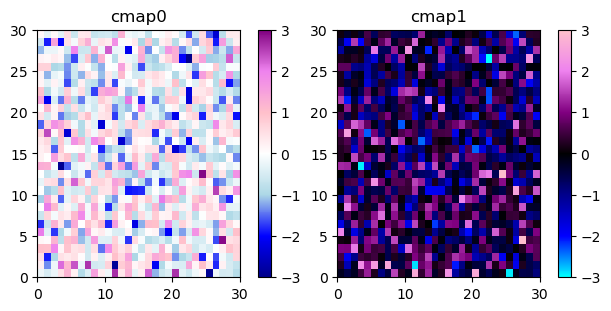

In [77]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])


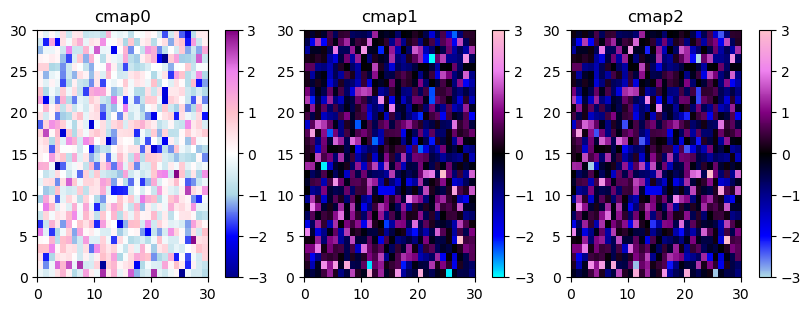

In [78]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "lightblue", "white", "pink", "violet", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["lightblue", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

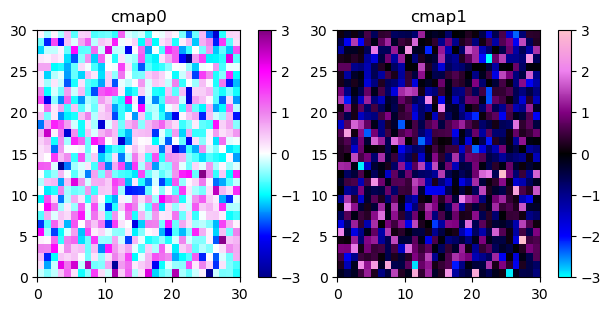

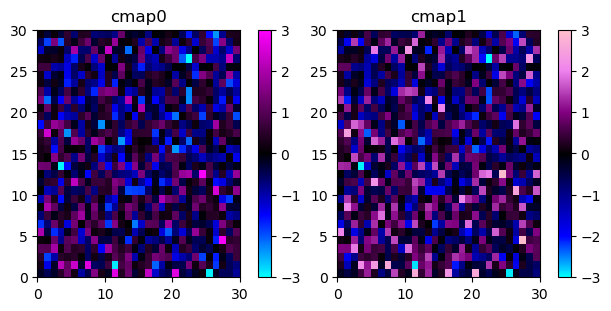

In [82]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "cyan", "white", "violet", "magenta", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["cyan", "blue", "black", "purple", "magenta"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
     ])])

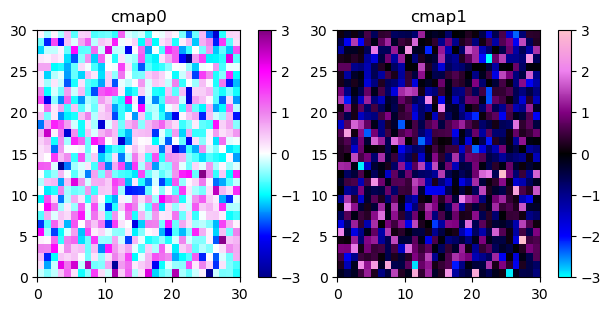

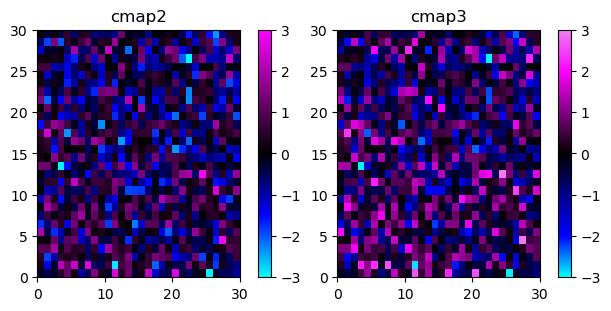

In [83]:
plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "cyan", "white", "violet", "magenta", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["cyan", "blue", "black", "purple", "magenta"],
         ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "violet"],
     ])], 
    row_len=2)

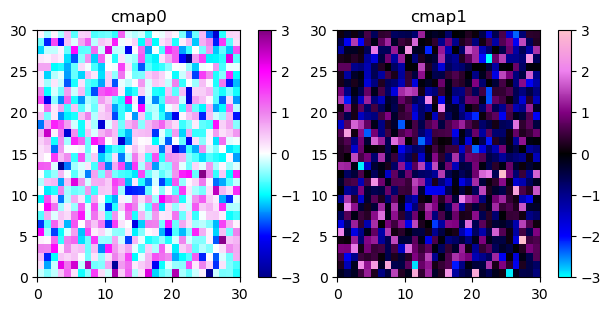

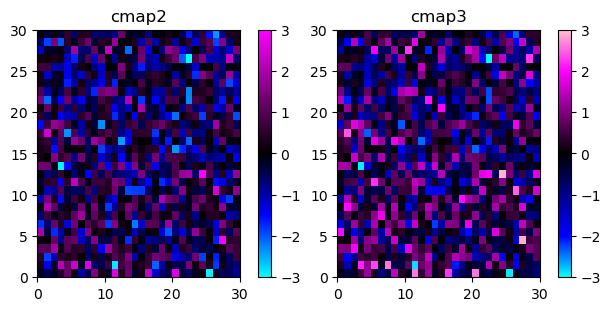

In [84]:

plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "cyan", "white", "violet", "magenta", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["cyan", "blue", "black", "purple", "magenta"],
         ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"],
     ])], row_len=2)

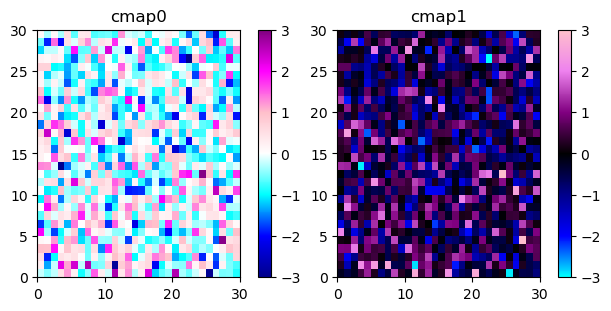

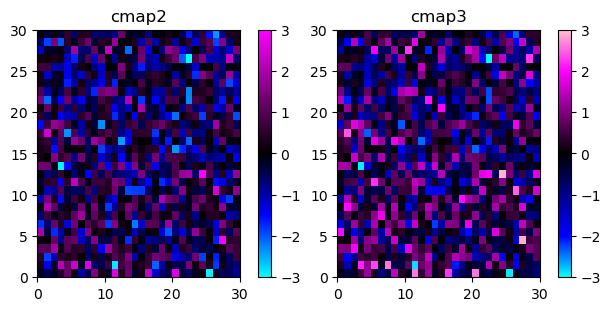

In [85]:

plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "cyan", "white", "pink", "magenta", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["cyan", "blue", "black", "purple", "magenta"],
         ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"],
     ])], 
    row_len=2)

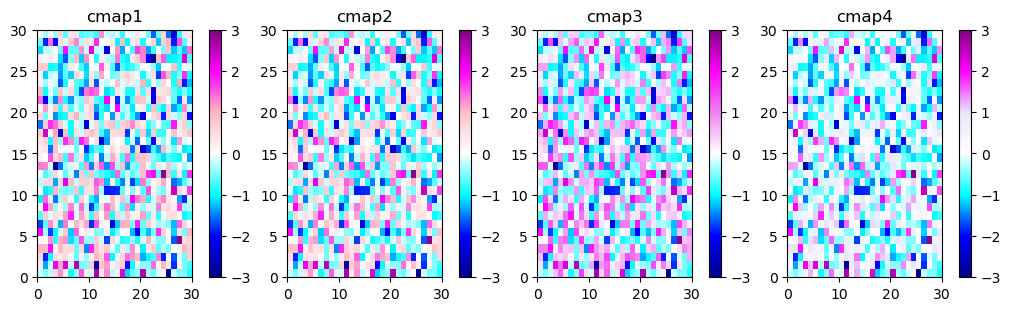

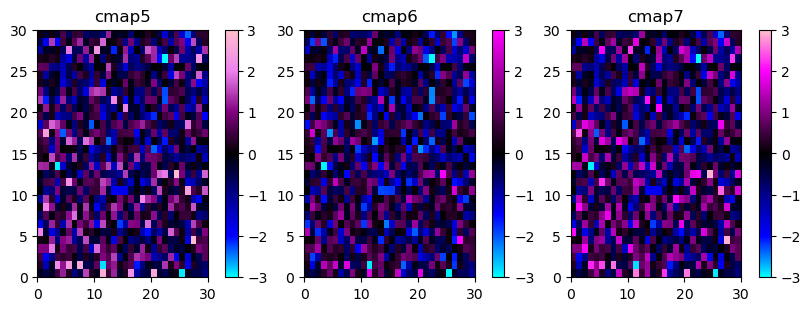

In [86]:

plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "cyan", "white", "lightpink", "magenta", "purple"],
         ["darkblue", "blue", "cyan", "white", "pink", "magenta", "purple"],
         ["darkblue", "blue", "cyan", "white", "violet", "magenta", "purple"],
         ["darkblue", "blue", "cyan", "white", "lavender", "magenta", "purple"],
         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],
         ["cyan", "blue", "black", "purple", "magenta"],
         ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"],
     ], start=1)])

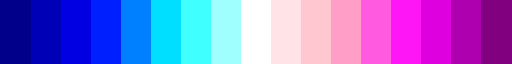

In [87]:
pink_v = [gradient_cmap.from_list(f"cmap{i}", colors)
          for i, colors
          in enumerate([
              ["darkblue", "blue", "cyan", "white", "lightpink", "magenta", "purple"],
              ["darkblue", "blue", "cyan", "white", "pink", "magenta", "purple"],
          ])]
pink_v[0].resampled(N)

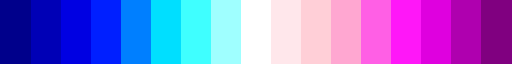

In [88]:
pink_v[1].resampled(N)

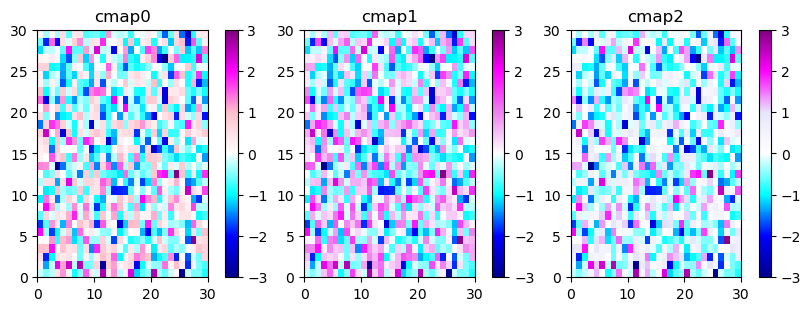

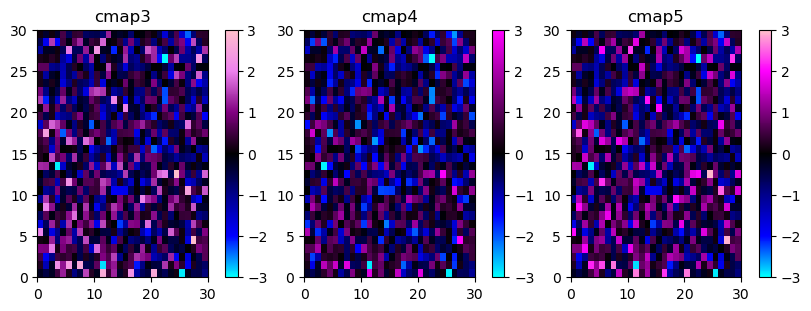

In [89]:

plot_examples(
    [gradient_cmap.from_list(f"cmap{i}", colors)
     for i, colors
     in enumerate([
         ["darkblue", "blue", "cyan", "white", "pink", "magenta", "purple"],
         ["darkblue", "blue", "cyan", "white", "violet", "magenta", "purple"],
         ["darkblue", "blue", "cyan", "white", "lavender", "magenta", "purple"],

         ["cyan", "blue", "darkblue", "black", "purple",  "violet", "pink"],

         ["cyan", "blue", "black", "purple", "magenta"],
         ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"],
     ])], row_len=3)

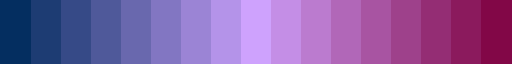

In [90]:
gradient_cmap.from_list("xkcd_explore", [
    'xkcd:marine',
    'xkcd:lilac',
    'xkcd:red purple'
]).resampled(N)

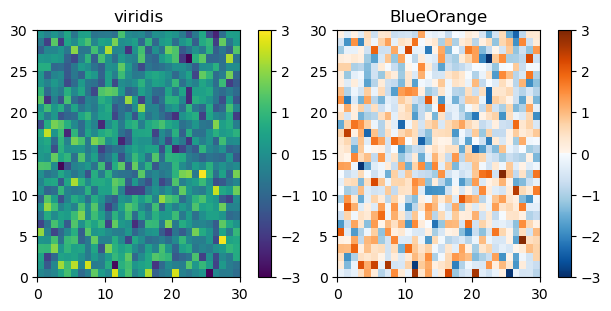

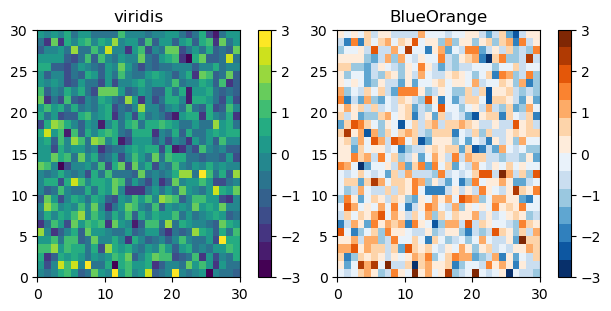

In [91]:
top = mcm['Blues_r'].resampled(128)
bottom = mcm['Oranges'].resampled(128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = categorical_cmap(newcolors, name='BlueOrange')
plot_examples([mcm['viridis'], newcmp])
plot_examples([mcm['viridis'], newcmp], resample_n=14)


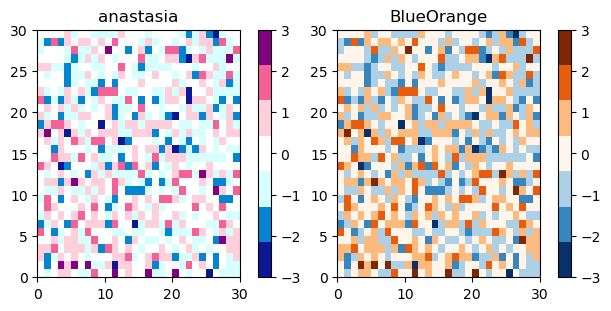

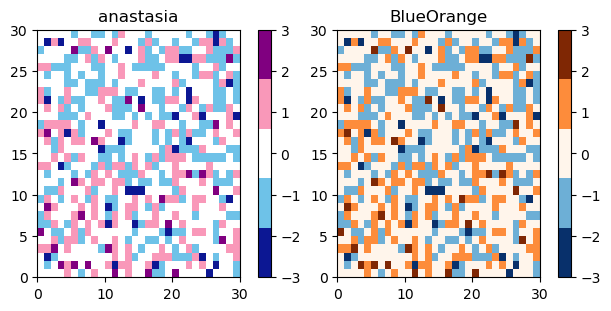

In [92]:
plot_examples([mcm['anastasia'].resampled(7), newcmp.resampled(7)])
plot_examples([mcm['anastasia'].resampled(5), newcmp.resampled(5)])

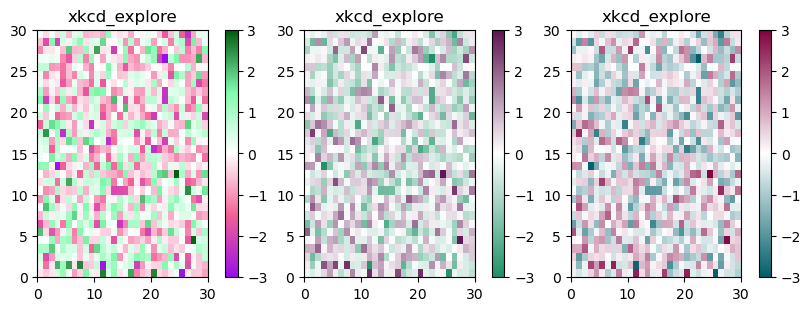

In [106]:
plot_examples([
    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:violet',
        'xkcd:medium pink',
        'w',
        'xkcd:seafoam',
        'xkcd:deep green'
    ]),
    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:viridian',
        'w',
        'xkcd:grape purple',
    ]),
    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:petrol',
        'w',
        'xkcd:wine'
    ])
], row_len=3)

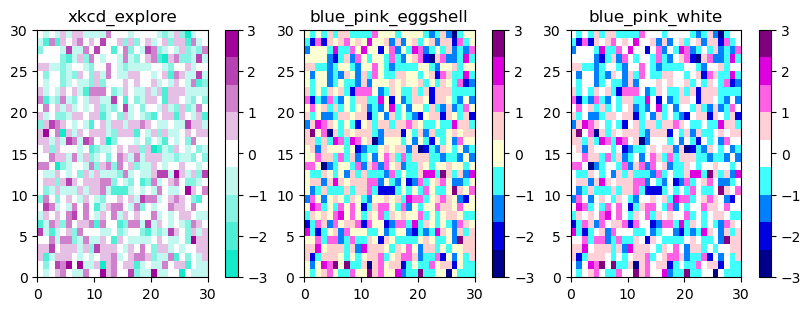

In [113]:

plot_examples([
    gradient_cmap.from_list("barney", [
        'xkcd:aqua',
        'xkcd:pale grey',
        'xkcd:barney purple'
    ]),
    gradient_cmap.from_list(
        "blue_pink_eggshell",
        ["darkblue", "blue", "cyan", "xkcd:eggshell", "pink", "magenta", "purple"]),
    gradient_cmap.from_list(
        "blue_pink_white",
        ["darkblue", "blue", "cyan", "w", "pink", "magenta", "purple"]),
], resample_n=9)


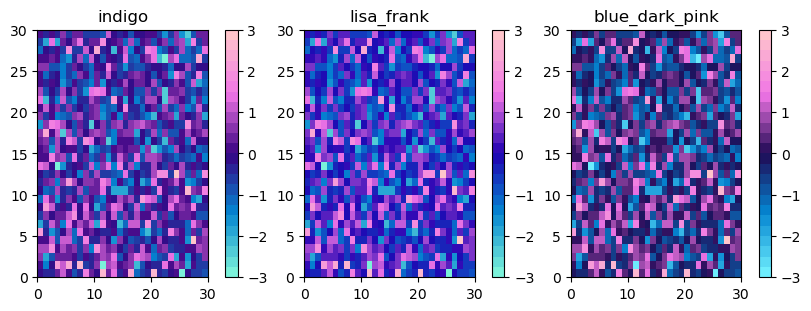

In [122]:

plot_examples([
    gradient_cmap.from_list("indigo", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:indigo',
        'xkcd:purply pink', "xkcd:light rose"
    ]),

    gradient_cmap.from_list("lisa_frank", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:ultramarine',
        'xkcd:purply pink', "xkcd:light rose"
    ]),
mcm['blue_dark_pink']


], resample_n=24)


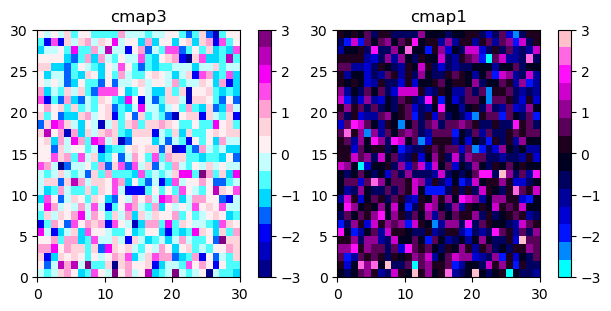

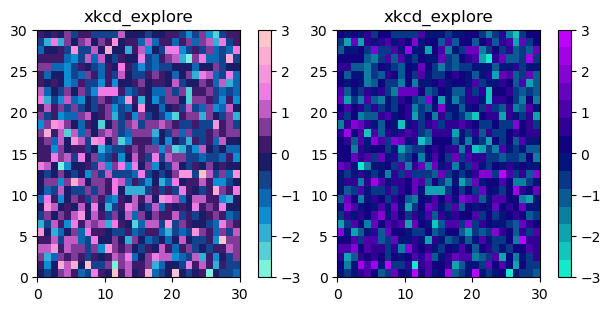

In [99]:

plot_examples([
    gradient_cmap.from_list(
        "cmap3",
        ["darkblue", "blue", "cyan", "xkcd:pale grey", "pink", "magenta", "purple"]),
    gradient_cmap.from_list(
        "cmap1",
        ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"]),

    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:dark indigo',
        'xkcd:purply pink', "xkcd:light rose"
    ]),


    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:aqua',
        'xkcd:deep blue',
        'xkcd:bright purple'
    ])
], resample_n=14, row_len=2)


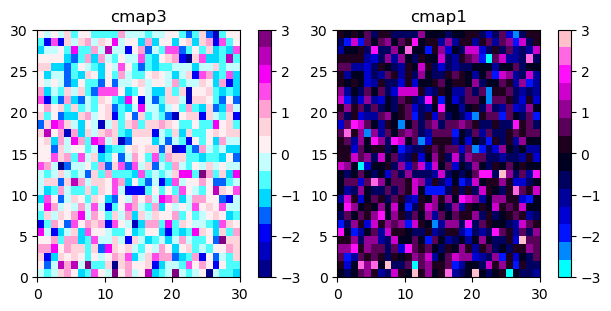

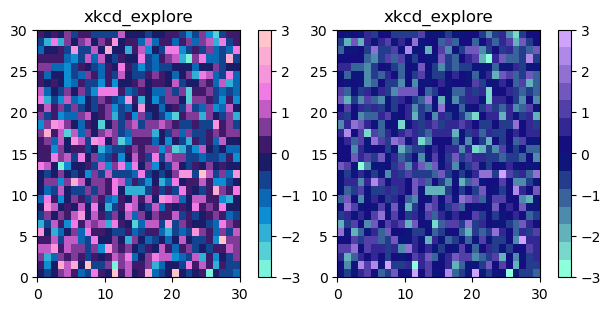

In [100]:

plot_examples([
    gradient_cmap.from_list(
        "cmap3",
        ["darkblue", "blue", "cyan", "xkcd:pale grey", "pink", "magenta", "purple"]),
    gradient_cmap.from_list(
        "cmap1",
        ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"]),

    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:dark indigo',
        'xkcd:purply pink', "xkcd:light rose"
    ]),


    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:light aqua',
        'xkcd:deep blue',
        'xkcd:lilac'
    ])
], resample_n=14, row_len=2)


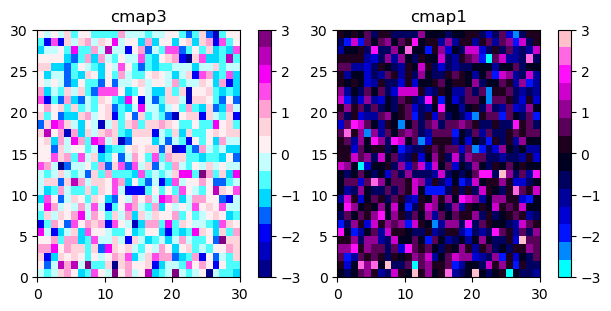

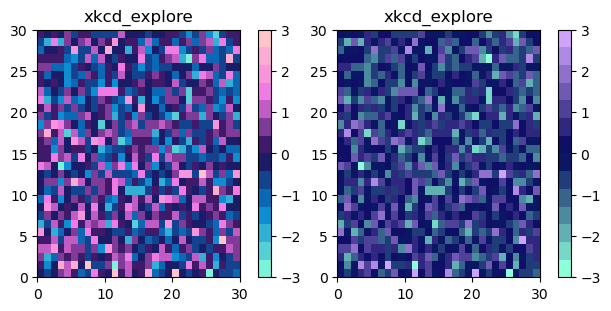

In [101]:

plot_examples([
    gradient_cmap.from_list(
        "cmap3",
        ["darkblue", "blue", "cyan", "xkcd:pale grey", "pink", "magenta", "purple"]),
    gradient_cmap.from_list(
        "cmap1",
        ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"]),

    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:dark indigo',
        'xkcd:purply pink', "xkcd:light rose"
    ]),


    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:light aqua',
        'xkcd:dark blue',
        'xkcd:lilac'
    ])
], resample_n=14, row_len=2)


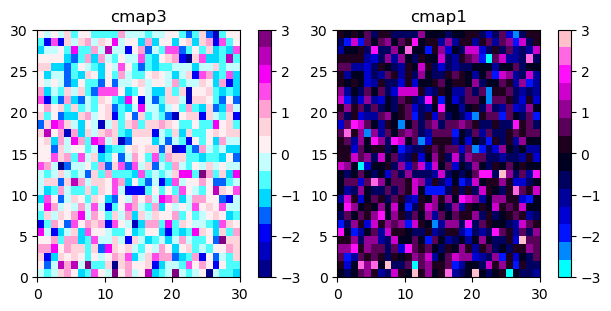

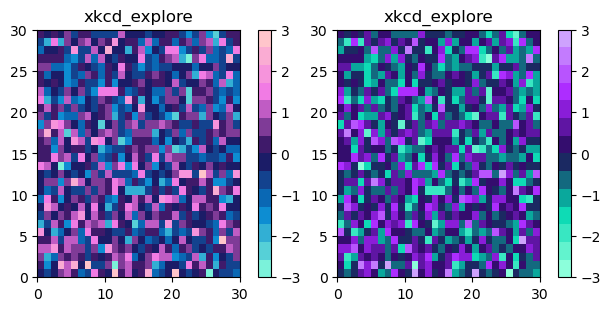

In [102]:

plot_examples([
    gradient_cmap.from_list(
        "cmap3",
        ["darkblue", "blue", "cyan", "xkcd:pale grey", "pink", "magenta", "purple"]),
    gradient_cmap.from_list(
        "cmap1",
        ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"]),

    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:dark indigo',
        'xkcd:purply pink',
        "xkcd:light rose"
    ]),


    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:light aqua',
        'xkcd:aquamarine',
        'xkcd:dark indigo',
        'xkcd:electric purple',
        'xkcd:lilac'
    ])
], resample_n=14, row_len=2)


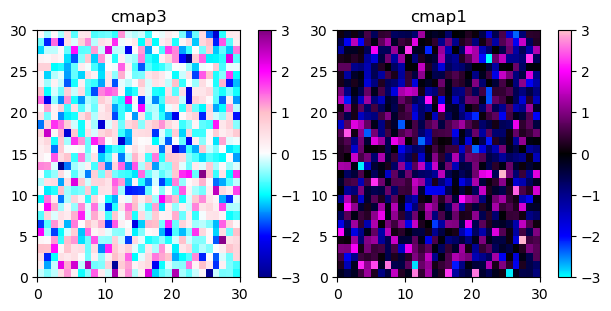

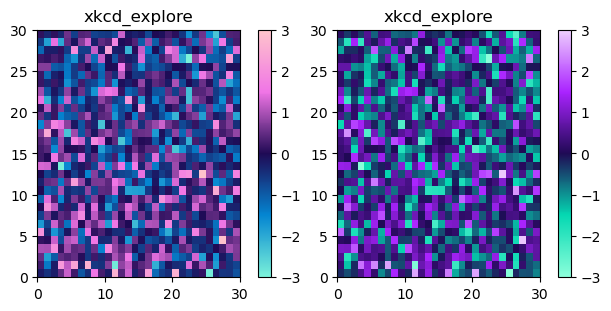

In [103]:

plot_examples([
    gradient_cmap.from_list(
        "cmap3",
        ["darkblue", "blue", "cyan", "xkcd:pale grey", "pink", "magenta", "purple"]),
    gradient_cmap.from_list(
        "cmap1",
        ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"]),
])
plot_examples([
    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:dark indigo',
        'xkcd:purply pink',
        "xkcd:light rose"
    ]),


    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:light aqua',
        'xkcd:aquamarine',
        'xkcd:dark indigo',
        'xkcd:electric purple',
        'xkcd:pale lavender'
    ])
])

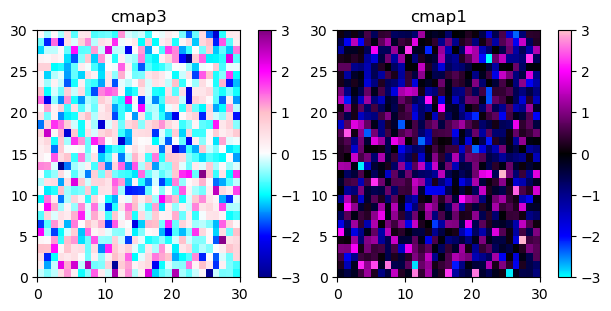

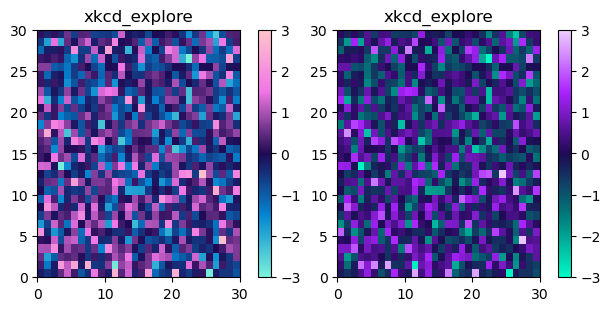

In [104]:

plot_examples([
    gradient_cmap.from_list(
        "cmap3",
        ["darkblue", "blue", "cyan", "xkcd:pale grey", "pink", "magenta", "purple"]),
    gradient_cmap.from_list(
        "cmap1",
        ["cyan", "blue", "darkblue", "black", "purple",  "magenta", "pink"]),
])
plot_examples([
    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:tiffany blue',
        'xkcd:cerulean',
        'xkcd:dark indigo',
        'xkcd:purply pink',
        "xkcd:light rose"
    ]),


    gradient_cmap.from_list("xkcd_explore", [
        'xkcd:bright teal',
        'xkcd:bluegreen',
        'xkcd:dark indigo',
        'xkcd:electric purple',
        'xkcd:pale lavender'
    ])
])

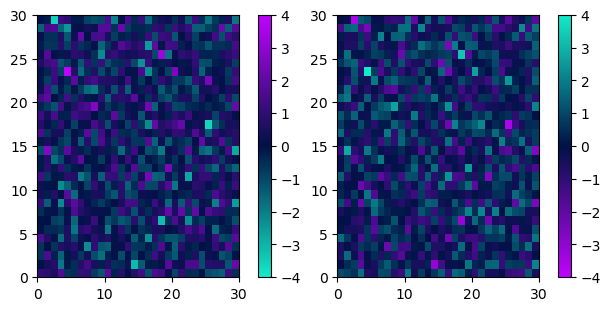

In [ ]:
my_cmap = gradient_cmap.from_list("my_cmap", [
    'xkcd:aqua',
    'xkcd:navy blue',
    'xkcd:bright purple'
])
my_cmap_r = my_cmap.reversed()

plot_examples([my_cmap, my_cmap_r])

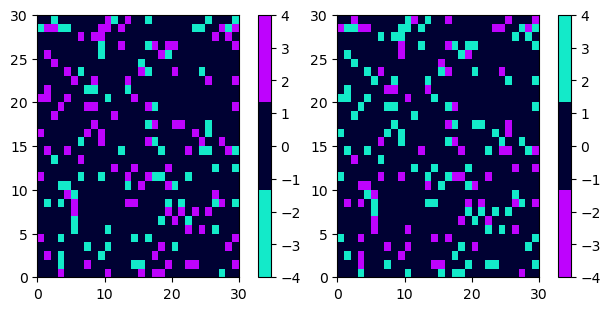

In [ ]:
colors = [
    'xkcd:aqua',
    'xkcd:very dark blue',
    'xkcd:bright purple'
]

my_cmap = categorical_cmap(colors, name="my_cmap")
my_cmap_r = my_cmap.reversed()

plot_examples([my_cmap, my_cmap_r])

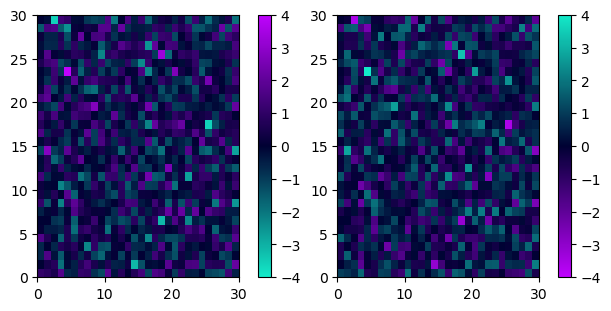

In [ ]:


my_cmap_gradient = gradient_cmap.from_list(
    name='my_cmap_gradient', colors=colors)
my_cmap_gradient_r = my_cmap_gradient.reversed()

plot_examples([my_cmap_gradient, my_cmap_gradient_r])

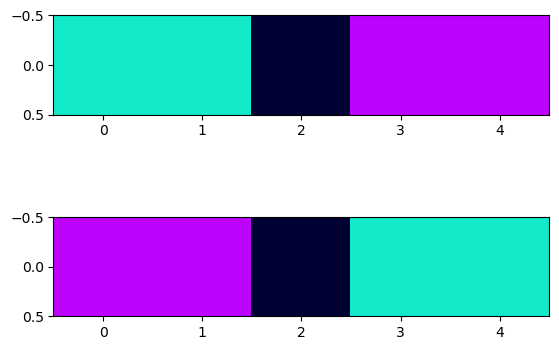

In [ ]:
# my_cmap, my_cmap_r from reversing a colormap
mcm.register(cmap=my_cmap)
mcm.register(cmap=my_cmap_r)

data = [[1, 2, 3, 4, 5]]

fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.imshow(data, cmap='my_cmap')
ax2.imshow(data, cmap='my_cmap_r')

plt.show()

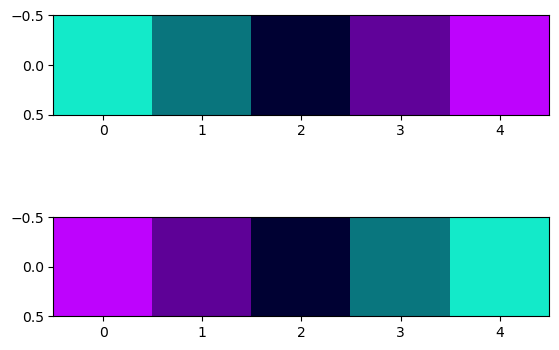

In [ ]:
# my_cmap, my_cmap_r from reversing a colormap
mcm.register(cmap=my_cmap_gradient)
mcm.register(cmap=my_cmap_gradient_r)

data = [[1, 2, 3, 4, 5]]

fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.imshow(data, cmap='my_cmap_gradient')
ax2.imshow(data, cmap='my_cmap_gradient_r')

plt.show()

In [ ]:
 my_cmap_grad3 = mcm['my_cmap_gradient'].resampled(3)

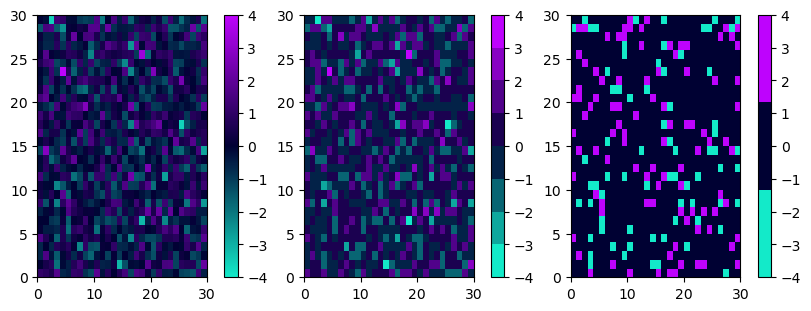

In [ ]:
 my_cmap_grad8 = mcm['my_cmap_gradient'].resampled(8)
 plot_examples([my_cmap_gradient, my_cmap_grad8, my_cmap])

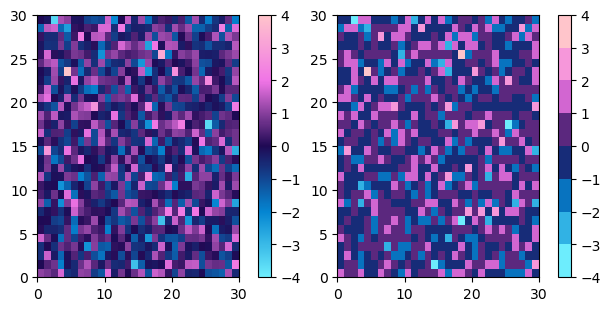

In [ ]:
mcm.register(cmap=blue_dark_pink)
blue_dark_pink_8 = mcm['blue_dark_pink'].resampled(8)
plot_examples([blue_dark_pink, blue_dark_pink_8])

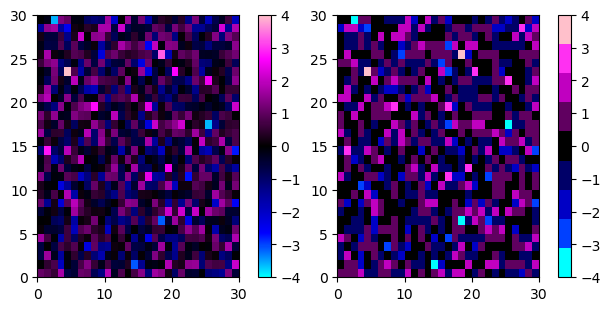

In [ ]:
mcm.register(cmap=blue_black_pink)
blue_black_pink_9 = mcm['blue_black_pink'].resampled(9)
plot_examples([blue_black_pink, blue_black_pink_9])

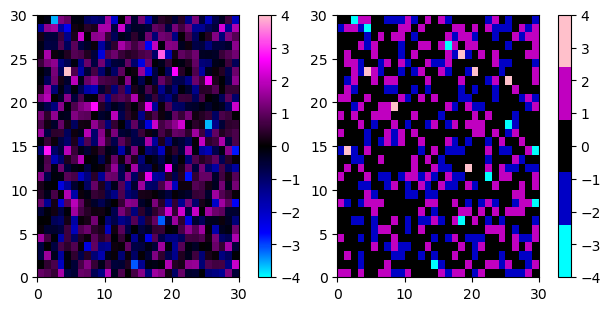

In [ ]:

blue_black_pink_5 = mcm['blue_black_pink'].resampled(5)
plot_examples([blue_black_pink, blue_black_pink_5])

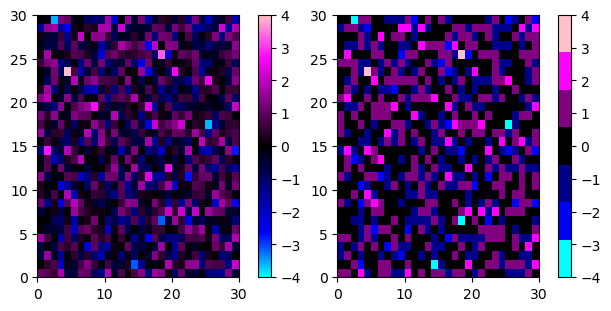

In [ ]:

blue_black_pink_7 = mcm['blue_black_pink'].resampled(7)
plot_examples([blue_black_pink, blue_black_pink_7])

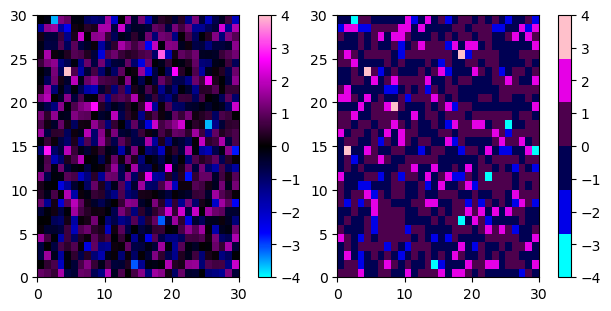

In [ ]:

blue_black_pink_6 = mcm['blue_black_pink'].resampled(6)
plot_examples([blue_black_pink, blue_black_pink_6])

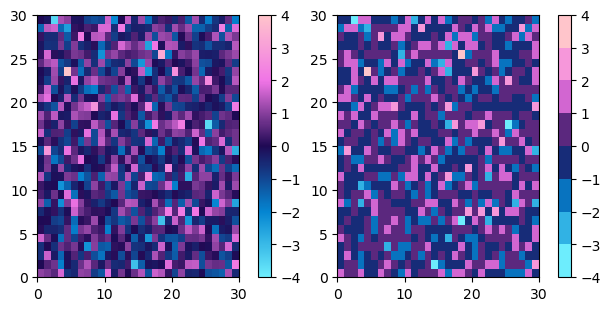

In [ ]:

blue_dark_pink_8 = mcm['blue_dark_pink'].resampled(8)
plot_examples([blue_dark_pink, blue_dark_pink_8])

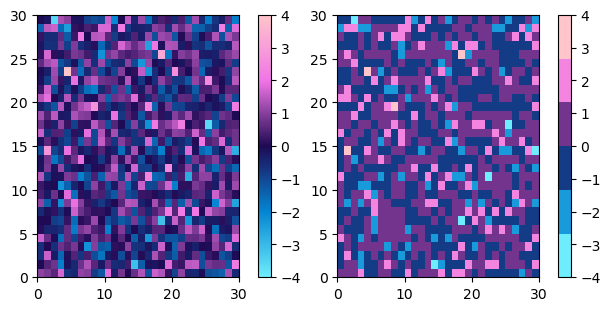

In [ ]:
plot_examples([blue_dark_pink, mcm['blue_dark_pink'].resampled(6)])

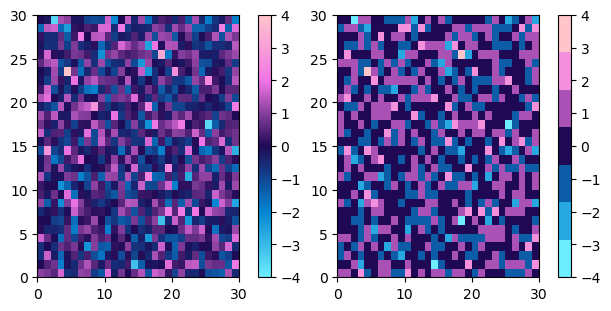

In [ ]:
blue_dark_pink_7 = mcm['blue_dark_pink'].resampled(7)
plot_examples([blue_dark_pink, blue_dark_pink_7])

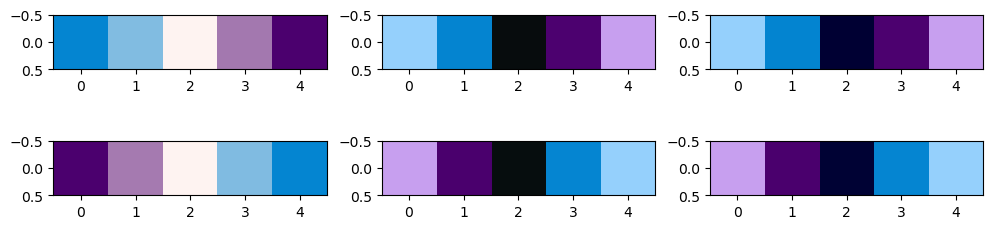

In [ ]:
data = [[1, 2, 3, 4, 5]]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3)

ax1[0].imshow(data, cmap='cerulean_royalty')
ax2[0].imshow(data, cmap='cerulean_royalty_r')
ax1[1].imshow(data, cmap='cerulean_royalty_dark')
ax2[1].imshow(data, cmap='cerulean_royalty_dark_r')
ax1[2].imshow(data, cmap='cerulean_royalty_dkbl')
ax2[2].imshow(data, cmap='cerulean_royalty_dkbl_r')
fig.set_size_inches(12, 3)
plt.show()

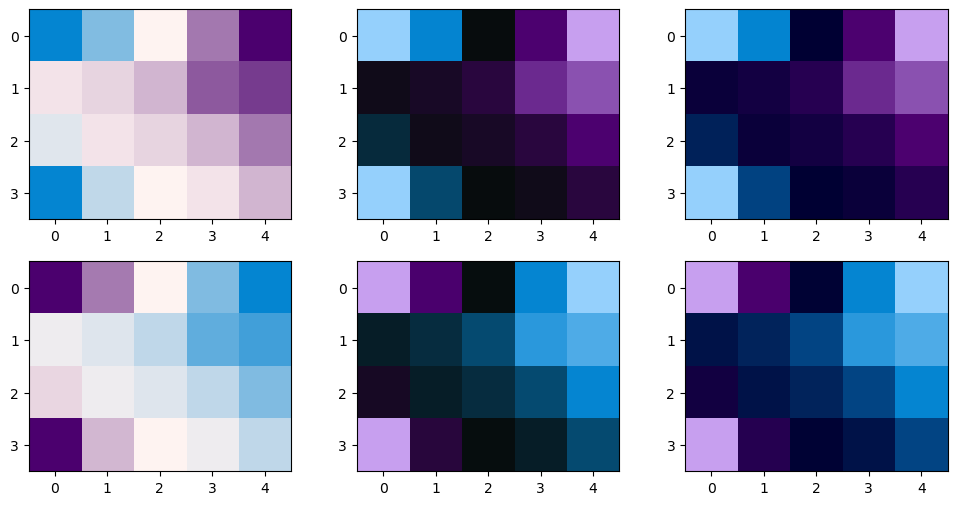

In [ ]:
data = [[-16, -8, 0, 8, 16],
        [1, 2, 4, 10, 12],
        [-2, 1, 2, 4, 8],
        [-16, -4, 0, 1, 4]]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3)

ax1[0].imshow(data, cmap='cerulean_royalty')
ax2[0].imshow(data, cmap='cerulean_royalty_r')
ax1[1].imshow(data, cmap='cerulean_royalty_dark')
ax2[1].imshow(data, cmap='cerulean_royalty_dark_r')
ax1[2].imshow(data, cmap='cerulean_royalty_dkbl')
ax2[2].imshow(data, cmap='cerulean_royalty_dkbl_r')
fig.set_size_inches(12, 6)
plt.show()

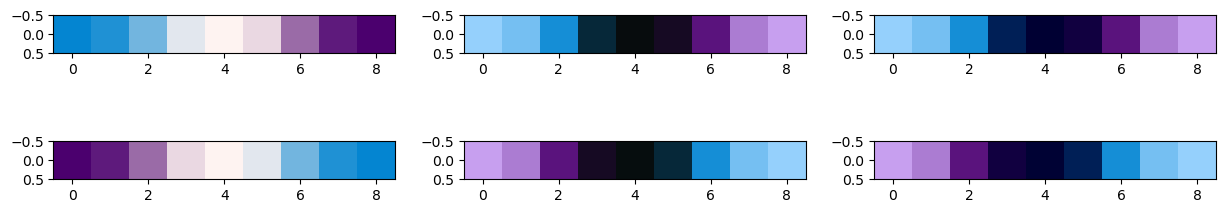

In [ ]:
data = [[-90, -80, -50, -10, 0, 10, 50, 80, 90]]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3)

ax1[0].imshow(data, cmap='cerulean_royalty')
ax2[0].imshow(data, cmap='cerulean_royalty_r')
ax1[1].imshow(data, cmap='cerulean_royalty_dark')
ax2[1].imshow(data, cmap='cerulean_royalty_dark_r')
ax1[2].imshow(data, cmap='cerulean_royalty_dkbl')
ax2[2].imshow(data, cmap='cerulean_royalty_dkbl_r')
fig.set_size_inches(15, 3)

plt.show()

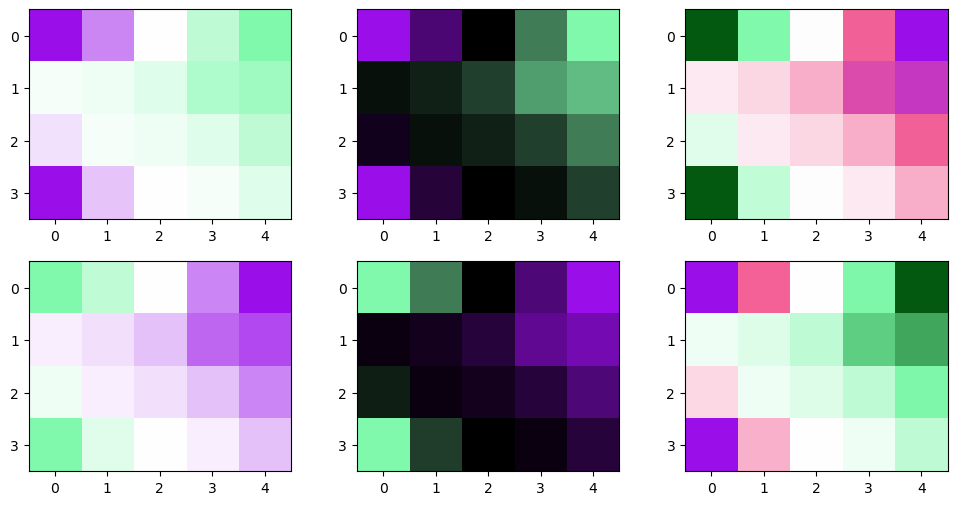

In [ ]:
data = [[-16, -8, 0, 8, 16],
        [1, 2, 4, 10, 12],
        [-2, 1, 2, 4, 8],
        [-16, -4, 0, 1, 4]]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3)

ax1[0].imshow(data, cmap='violet_seafoam')
ax2[0].imshow(data, cmap='violet_seafoam_r')
ax1[1].imshow(data, cmap='violet_seafoam_dark')
ax2[1].imshow(data, cmap='violet_seafoam_dark_r')
ax1[2].imshow(data, cmap='violet_seafoam_pink')
ax2[2].imshow(data, cmap='violet_seafoam_pink_r')
fig.set_size_inches(12, 6)
plt.show()

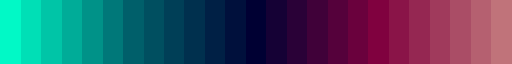

In [ ]:
mcm['petrol_wine_dark'].resampled(25)

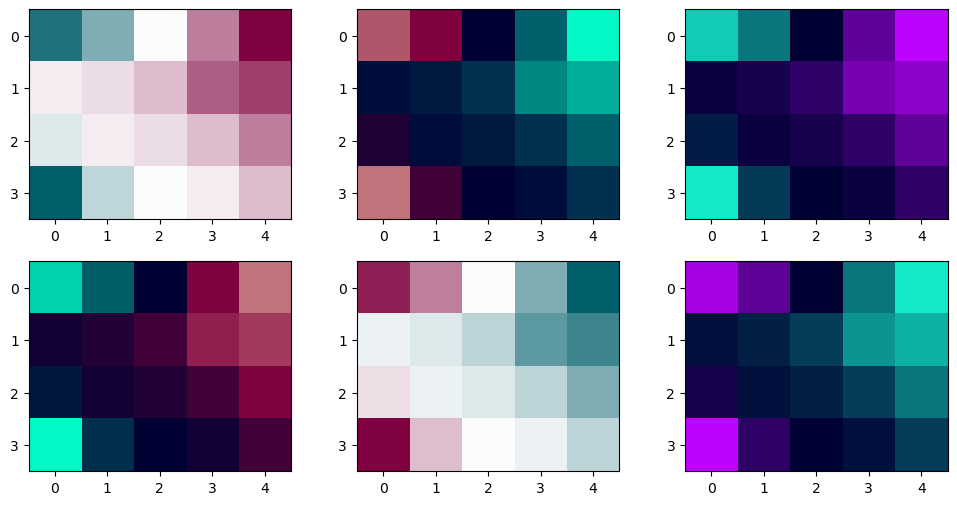

In [ ]:
data = [[-14, -8, 0, 8, 16],
        [1, 2, 4, 10, 12],
        [-2, 1, 2, 4, 8],
        [-16, -4, 0, 1, 4]]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3)

ax1[0].imshow(data, cmap='petrol_wine')
ax2[1].imshow(data, cmap='petrol_wine_r')
ax2[0].imshow(data, cmap='petrol_wine_dark')
ax1[1].imshow(data, cmap='petrol_wine_dark_r')
ax1[2].imshow(data, cmap='aqua_purple')
ax2[2].imshow(data, cmap='aqua_purple_r')
fig.set_size_inches(12, 6)
plt.show()

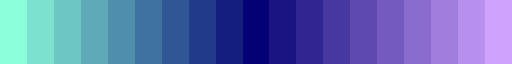

In [ ]:
mcm['bruise'].resampled(15)